In [102]:
# 🔢 Основные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import scipy.stats

# 🧠 Модели и пайплайны
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import clone
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# 🔍 Модельная оптимизация
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, ParameterGrid, StratifiedKFold

# 📈 Метрики
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score, roc_curve, precision_recall_curve, auc, mean_absolute_error, mean_squared_error, r2_score
)

# ⚙️ Разное
from tqdm import tqdm
from datetime import date, datetime
import time
import re
import plotly.express as px
import plotly.io as pio
from scipy.stats import mode
import plotly.express as px
import warnings
from IPython.display import display
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.utils.validation')
warnings.simplefilter(action='ignore', category=FutureWarning)

# 🌍 ML-библиотеки
from catboost import CatBoostClassifier, CatBoostRegressor, Pool
from lightgbm import LGBMClassifier, LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor
from IPython.display import display, Markdown
from sklearn.datasets import fetch_california_housing
from scipy.stats import chi2_contingency, ttest_1samp, ttest_ind, norm

# 🌍 DL-библиотеки
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

[CV] END model=DecisionTreeRegressor(random_state=42), model__max_depth=5, model__min_samples_leaf=10; total time=   2.0s
[CV] END model=DecisionTreeRegressor(random_state=42), model__max_depth=10, model__min_samples_leaf=10; total time=   3.1s
[CV] END model=RandomForestRegressor(n_jobs=-1, random_state=42), model__max_depth=6, model__n_estimators=30; total time=  15.3s
[CV] END model=DecisionTreeRegressor(random_state=42), model__max_depth=5, model__min_samples_leaf=50; total time=   2.3s
[CV] END model=RandomForestRegressor(n_jobs=-1, random_state=42), model__max_depth=6, model__n_estimators=30; total time=  10.5s
[CV] END model=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importan

# 📁 Загрузка и предобработка данных

## Загрузка данных

In [2]:
data = pd.read_csv('vehicles.csv')
display(data.head(10))
data.info()

id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   
5  7222379453  https://hudsonvalley.craigslist.org/cto/d/west...   
6  7221952215  https://hudsonvalley.craigslist.org/cto/d/west...   
7  7220195662  https://hudsonvalley.craigslist.org/cto/d/poug...   
8  7209064557  https://medford.craigslist.org/cto/d/grants-pa...   
9  7219485069  https://erie.craigslist.org/cto/d/erie-2012-su...   

                   region                           region_url  price  year  \
0                prescott      https://prescott.craigslist.org   6000   NaN   
1            fayetteville         https://fayar.craigslist.org  11900   NaN   
2            florida keys          https://keys.craigslist.org  21000   NaN   
3  worcester / central MA     https://worcester.craigslist.org   1500   NaN   
4              greensboro    https://greensboro.craigslist.org   4900   NaN   
5           hudson valley  https://hudsonvalley.craigslist.org   1600   NaN   
6           hudson valley  https://hudsonvalley.craigslist.org   1000   NaN   
7           hudson valley  https://hudsonvalley.craigslist.org  15995   NaN   
8         medford-ashland       https://medford.craigslist.org   5000   NaN   
9                    erie          https://erie.craigslist.org   3000   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
1          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
2          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
3          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
4          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
5          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
6          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
7          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
8          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
9          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   

  image_url description county state lat long posting_date  
0       NaN         NaN    NaN    az NaN  NaN          NaN  
1       NaN         NaN    NaN    ar NaN  NaN          NaN  
2       NaN         NaN    NaN    fl NaN  NaN          NaN  
3       NaN         NaN    NaN    ma NaN  NaN          NaN  
4       NaN         NaN    NaN    nc NaN  NaN          NaN  
5       NaN         NaN    NaN    ny NaN  NaN          NaN  
6       NaN         NaN    NaN    ny NaN  NaN          NaN  
7       NaN         NaN    NaN    ny NaN  NaN          NaN  
8       NaN         NaN    NaN    or NaN  NaN          NaN  
9       NaN         NaN    NaN    pa NaN  NaN          NaN  

[10 rows x 26 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [3]:
display(data.tail())

id                                                url  \
426875  7301591192  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426876  7301591187  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426877  7301591147  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426878  7301591140  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426879  7301591129  https://wyoming.craigslist.org/ctd/d/atlanta-2...   

         region                      region_url  price    year manufacturer  \
426875  wyoming  https://wyoming.craigslist.org  23590  2019.0       nissan   
426876  wyoming  https://wyoming.craigslist.org  30590  2020.0        volvo   
426877  wyoming  https://wyoming.craigslist.org  34990  2020.0     cadillac   
426878  wyoming  https://wyoming.craigslist.org  28990  2018.0        lexus   
426879  wyoming  https://wyoming.craigslist.org  30590  2019.0          bmw   

                           model condition    cylinders  ... size       type  \
426875         maxima s sedan 4d      good  6 cylinders  ...  NaN      sedan   
426876  s60 t5 momentum sedan 4d      good          NaN  ...  NaN      sedan   
426877          xt4 sport suv 4d      good          NaN  ...  NaN  hatchback   
426878           es 350 sedan 4d      good  6 cylinders  ...  NaN      sedan   
426879  4 series 430i gran coupe      good          NaN  ...  NaN      coupe   

       paint_color                                          image_url  \
426875         NaN  https://images.craigslist.org/00o0o_iiraFnHg8q...   
426876         red  https://images.craigslist.org/00x0x_15sbgnxCIS...   
426877       white  https://images.craigslist.org/00L0L_farM7bxnxR...   
426878      silver  https://images.craigslist.org/00z0z_bKnIVGLkDT...   
426879         NaN  https://images.craigslist.org/00Y0Y_lEUocjyRxa...   

                                              description county state  \
426875  Carvana is the safer way to buy a car During t...    NaN    wy   
426876  Carvana is the safer way to buy a car During t...    NaN    wy   
426877  Carvana is the safer way to buy a car During t...    NaN    wy   
426878  Carvana is the safer way to buy a car During t...    NaN    wy   
426879  Carvana is the safer way to buy a car During t...    NaN    wy   

              lat       long              posting_date  
426875  33.786500 -84.445400  2021-04-04T03:21:31-0600  
426876  33.786500 -84.445400  2021-04-04T03:21:29-0600  
426877  33.779214 -84.411811  2021-04-04T03:21:17-0600  
426878  33.786500 -84.445400  2021-04-04T03:21:11-0600  
426879  33.779214 -84.411811  2021-04-04T03:21:07-0600  

[5 rows x 26 columns]

## Предобработка данных

In [4]:
data = data.drop(['id', 'url', 'region_url', 'image_url'], axis = 1)
display(data.head())

region  price  year manufacturer model condition cylinders  \
0                prescott   6000   NaN          NaN   NaN       NaN       NaN   
1            fayetteville  11900   NaN          NaN   NaN       NaN       NaN   
2            florida keys  21000   NaN          NaN   NaN       NaN       NaN   
3  worcester / central MA   1500   NaN          NaN   NaN       NaN       NaN   
4              greensboro   4900   NaN          NaN   NaN       NaN       NaN   

  fuel  odometer title_status  ... drive size type paint_color description  \
0  NaN       NaN          NaN  ...   NaN  NaN  NaN         NaN         NaN   
1  NaN       NaN          NaN  ...   NaN  NaN  NaN         NaN         NaN   
2  NaN       NaN          NaN  ...   NaN  NaN  NaN         NaN         NaN   
3  NaN       NaN          NaN  ...   NaN  NaN  NaN         NaN         NaN   
4  NaN       NaN          NaN  ...   NaN  NaN  NaN         NaN         NaN   

  county state  lat long  posting_date  
0    NaN    az  NaN  NaN           NaN  
1    NaN    ar  NaN  NaN           NaN  
2    NaN    fl  NaN  NaN           NaN  
3    NaN    ma  NaN  NaN           NaN  
4    NaN    nc  NaN  NaN           NaN  

[5 rows x 22 columns]

In [5]:
data.isna().mean().sort_values()

region          0.000000
price           0.000000
state           0.000000
posting_date    0.000159
description     0.000164
year            0.002823
transmission    0.005988
fuel            0.007058
odometer        0.010307
model           0.012362
long            0.015342
lat             0.015342
title_status    0.019308
manufacturer    0.041337
type            0.217527
paint_color     0.305011
drive           0.305863
VIN             0.377254
condition       0.407852
cylinders       0.416225
size            0.717675
county          1.000000
dtype: float64

In [6]:
data = data.drop(['county', 'size', 'cylinders', 'condition', 'VIN'], axis = 1)

In [7]:
{col: data[col].unique() for col in data.columns if data[col].isna().mean() > 0.2}

{'drive': array([nan, 'rwd', '4wd', 'fwd'], dtype=object),
 'type': array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
        'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
        'wagon'], dtype=object),
 'paint_color': array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
        'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)}

In [8]:
cols_to_fill = ['drive', 'type', 'paint_color']

data[cols_to_fill] = data[cols_to_fill].fillna('unknown')

In [9]:
def preprocessor(df):
    print("-" * 75)
    print('Количество пропусков в каждом из столбцов:')
    print(df.isna().sum())
    print("-" * 75)
    
    print(f'Количество дубликатов: {df.duplicated().sum()}')
    print("-" * 75)

    for col in df.select_dtypes(include='object').columns:
        print(f"Столбец: {col}")
        print(df[col].unique())
        print("-" * 75)

In [10]:
print(preprocessor(data))

---------------------------------------------------------------------------
Количество пропусков в каждом из столбцов:
region              0
price               0
year             1205
manufacturer    17646
model            5277
fuel             3013
odometer         4400
title_status     8242
transmission     2556
drive               0
type                0
paint_color         0
description        70
state               0
lat              6549
long             6549
posting_date       68
dtype: int64
---------------------------------------------------------------------------
Количество дубликатов: 20
---------------------------------------------------------------------------
Столбец: region
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgo

In [11]:
data = data.drop(['description', 'region'], axis=1)
print(preprocessor(data))

---------------------------------------------------------------------------
Количество пропусков в каждом из столбцов:
price               0
year             1205
manufacturer    17646
model            5277
fuel             3013
odometer         4400
title_status     8242
transmission     2556
drive               0
type                0
paint_color         0
state               0
lat              6549
long             6549
posting_date       68
dtype: int64
---------------------------------------------------------------------------
Количество дубликатов: 464
---------------------------------------------------------------------------
Столбец: manufacturer
[nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'm

In [12]:
data = data.drop_duplicates()
print(data.duplicated().sum())

0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426416 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426416 non-null  int64  
 1   year          425224 non-null  float64
 2   manufacturer  408786 non-null  object 
 3   model         421152 non-null  object 
 4   fuel          423416 non-null  object 
 5   odometer      422030 non-null  float64
 6   title_status  418239 non-null  object 
 7   transmission  423873 non-null  object 
 8   drive         426416 non-null  object 
 9   type          426416 non-null  object 
 10  paint_color   426416 non-null  object 
 11  state         426416 non-null  object 
 12  lat           419880 non-null  float64
 13  long          419880 non-null  float64
 14  posting_date  426361 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 52.1+ MB


In [14]:
print(data['odometer'].tail())

426875    32226.0
426876    12029.0
426877     4174.0
426878    30112.0
426879    22716.0
Name: odometer, dtype: float64


In [15]:
data["year"] = data["year"].astype("Int64")  
data["odometer"] = data["odometer"].astype("Int64")  

cat_cols = ["manufacturer", "model", "fuel", "title_status", "transmission",
            "drive", "type", "paint_color", "state"]

for col in cat_cols:
    data[col] = data[col].astype("category")

data["posting_date"] = pd.to_datetime(data["posting_date"], errors="coerce", utc=True) 


In [16]:
data['year'] = data['year'].fillna(data['year'].median())
data['odometer'] = data['odometer'].fillna(data['odometer'].median())

data['posting_date'] = data['posting_date'].fillna(data['posting_date'].mode()[0])

data = data.drop(['lat', 'long'], axis=1)

In [17]:
cat_cols = ['manufacturer', 'model', 'fuel', 'title_status', 'transmission']

for col in cat_cols:
    if 'unknown' not in data[col].cat.categories:
        data[col] = data[col].cat.add_categories('unknown')
    data[col] = data[col].fillna('unknown')

cat_cols = ['manufacturer', 'model', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']

unknown_counts = (data[cat_cols] == 'unknown').sum(axis=1)

threshold = len(cat_cols) // 2  
data = data[unknown_counts <= threshold].copy()

In [18]:
display(data.head())
print(data.isna().sum())
data.info()

price  year manufacturer                     model fuel  odometer  \
27  33590  2014          gmc  sierra 1500 crew cab slt  gas     57923   
28  22590  2010    chevrolet            silverado 1500  gas     71229   
29  39590  2020    chevrolet       silverado 1500 crew  gas     19160   
30  30990  2017       toyota      tundra double cab sr  gas     41124   
31  15000  2013         ford                 f-150 xlt  gas    128000   

   title_status transmission    drive    type paint_color state  \
27        clean        other  unknown  pickup       white    al   
28        clean        other  unknown  pickup        blue    al   
29        clean        other  unknown  pickup         red    al   
30        clean        other  unknown  pickup         red    al   
31        clean    automatic      rwd   truck       black    al   

                posting_date  
27 2021-05-04 17:31:18+00:00  
28 2021-05-04 17:31:08+00:00  
29 2021-05-04 17:31:25+00:00  
30 2021-05-04 15:41:31+00:00  
31 2021-05-03 19:02:03+00:00

price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
posting_date    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 425609 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   price         425609 non-null  int64              
 1   year          425609 non-null  Int64              
 2   manufacturer  425609 non-null  category           
 3   model         425609 non-null  category           
 4   fuel          425609 non-null  category           
 5   odometer      425609 non-null  Int64              
 6   title_status  425609 non-null  category           
 7   transmission  425609 non-null  category           
 8   drive         425609 non-null  category           
 9   type          425609 non-

# 🔍 Исследовательский анализ данных (EDA)

In [19]:
display(data.head(10))

price  year manufacturer                        model fuel  odometer  \
27  33590  2014          gmc     sierra 1500 crew cab slt  gas     57923   
28  22590  2010    chevrolet               silverado 1500  gas     71229   
29  39590  2020    chevrolet          silverado 1500 crew  gas     19160   
30  30990  2017       toyota         tundra double cab sr  gas     41124   
31  15000  2013         ford                    f-150 xlt  gas    128000   
32  27990  2012          gmc  sierra 2500 hd extended cab  gas     68696   
33  34590  2016    chevrolet        silverado 1500 double  gas     29499   
34  35000  2019       toyota                       tacoma  gas     43000   
35  29990  2016    chevrolet        colorado extended cab  gas     17302   
36  38590  2011    chevrolet         corvette grand sport  gas     30237   

   title_status transmission    drive    type paint_color state  \
27        clean        other  unknown  pickup       white    al   
28        clean        other  unknown  pickup        blue    al   
29        clean        other  unknown  pickup         red    al   
30        clean        other  unknown  pickup         red    al   
31        clean    automatic      rwd   truck       black    al   
32        clean        other      4wd  pickup       black    al   
33        clean        other      4wd  pickup      silver    al   
34        clean    automatic      4wd   truck        grey    al   
35        clean        other      4wd  pickup         red    al   
36        clean        other      rwd   other         red    al   

                posting_date  
27 2021-05-04 17:31:18+00:00  
28 2021-05-04 17:31:08+00:00  
29 2021-05-04 17:31:25+00:00  
30 2021-05-04 15:41:31+00:00  
31 2021-05-03 19:02:03+00:00  
32 2021-05-03 18:41:25+00:00  
33 2021-05-03 17:41:33+00:00  
34 2021-05-03 17:12:59+00:00  
35 2021-05-03 16:31:14+00:00  
36 2021-05-03 12:50:35+00:00

## Нормализация количественных признаков

In [20]:
display(data.describe().T)

count          mean              std     min      25%      50%  \
price     425609.0  75388.411608  12200458.170001     0.0   5900.0  13976.0   
year      425609.0   2011.235068         9.446039  1900.0   2008.0   2013.0   
odometer  425609.0  97948.551429    213081.706177     0.0  38022.0  85553.0   

               75%           max  
price      26500.0  3736928711.0  
year        2017.0        2022.0  
odometer  133000.0    10000000.0

### Нормализация цены

In [21]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

print(f"Ограничение по IQR: {upper_bound}")

Ограничение по IQR: 57400.0


In [22]:
data = data.query('price <= @upper_bound')

<Axes: >

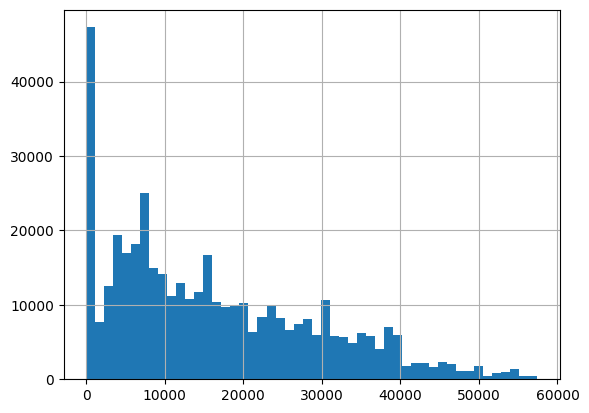

In [23]:
data['price'].hist(bins = 50)

In [24]:
display(data.query('price < 500').sample(10))

price  year manufacturer                       model    fuel  \
309048      0  2016       toyota                 rav4 le suv     gas   
349993      0  2016         ford                       f-550  diesel   
17748       0  2015      lincoln                     mkz fwd   other   
313296      0  2012         ford                       f-150     gas   
312169      0  2017          ram  2500 6-speed manual diesel  diesel   
284236     99  2017          kia                     sorento     gas   
18141       0  2010    chevrolet                      cobalt     gas   
49287       0  2019         ford            super duty f-350  diesel   
288970      1  1999       toyota                     4runner     gas   
108973      0  2011      hyundai                  accent gls     gas   

        odometer title_status transmission    drive     type paint_color  \
309048    114562        clean    automatic  unknown      SUV     unknown   
349993     37376        clean    automatic      rwd    truck       white   
17748      54388        clean    automatic      fwd    sedan     unknown   
313296    126968        clean    automatic      4wd    truck     unknown   
312169    135292        clean       manual      rwd    truck     unknown   
284236     39978        clean    automatic      4wd  unknown      custom   
18141     131916        clean    automatic      fwd    sedan        blue   
49287      73649        clean    automatic      4wd    truck       white   
288970    256000        clean    automatic      4wd      SUV      silver   
108973     20467        clean    automatic      fwd    sedan        blue   

       state              posting_date  
309048    ok 2021-04-24 13:55:37+00:00  
349993    sc 2021-04-12 11:22:16+00:00  
17748     ar 2021-04-22 11:50:25+00:00  
313296    or 2021-04-17 15:36:21+00:00  
312169    or 2021-04-25 19:55:01+00:00  
284236    nh 2021-04-28 21:01:00+00:00  
18141     ar 2021-04-13 15:45:42+00:00  
49287     ca 2021-04-30 17:15:40+00:00  
288970    oh 2021-04-23 20:06:23+00:00  
108973    fl 2021-04-26 21:49:45+00:00

In [25]:
cheap_cars = data.query('price < 500')
print(f"Доля машин дешевле $1000: {len(cheap_cars) / len(data):.2%}")

Доля машин дешевле $1000: 9.99%


In [26]:
data = data.query('price >= 500')

### Нормализация года

In [27]:
print(data.query('year < 1990').shape[0])

11472


In [28]:
display(data.sort_values('year').head(10))

price  year manufacturer              model      fuel  odometer  \
123023   4500  1900      unknown  cushman white van       gas      2136   
42454   38250  1900        acura                rdx       gas      4500   
269472    998  1900      unknown                any     other    123456   
398032    500  1900        dodge            rampage       gas    999999   
277762   4000  1901      unknown        olds type r       gas       100   
10353     999  1901      unknown                ALL       gas         1   
289145   3990  1905    chevrolet        astro cargo       gas    202570   
383491    750  1909      unknown   Mitsubshi FBC15K  electric    999999   
322057  15000  1910      unknown    1910 MAXWELL AA       gas         1   
407763  15000  1910      unknown         maxwell Aa       gas       100   

       title_status transmission    drive         type paint_color state  \
123023        clean       manual  unknown      unknown       white    ga   
42454         clean    automatic      4wd          SUV      silver    ca   
269472      missing        other  unknown        other     unknown    ny   
398032        clean        other      fwd        other     unknown    va   
277762      missing        other      rwd  convertible       black    ny   
10353         clean    automatic  unknown      unknown     unknown    az   
289145        clean    automatic      rwd          van       white    oh   
383491      missing    automatic  unknown        other      custom    tx   
322057        clean       manual  unknown  convertible         red    or   
407763        clean       manual  unknown  convertible         red    wa   

                    posting_date  
123023 2021-05-01 12:34:38+00:00  
42454  2021-04-30 23:19:15+00:00  
269472 2021-04-05 12:20:41+00:00  
398032 2021-05-03 13:33:10+00:00  
277762 2021-04-28 18:47:27+00:00  
10353  2021-05-04 15:15:21+00:00  
289145 2021-05-04 23:34:05+00:00  
383491 2021-04-22 18:44:01+00:00  
322057 2021-05-04 20:01:06+00:00  
407763 2021-05-04 20:11:21+00:00

In [29]:
data = data.query('year >= 1990')

### Нормализация пробега

In [30]:
Q1 = data['odometer'].quantile(0.25)
Q3 = data['odometer'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

print(f"Ограничение по IQR: {upper_bound}")

Ограничение по IQR: 284395.5


In [31]:
data = data.query('odometer <= @upper_bound')

## Распределение количественных признаков

### Общее распределение

count          mean           std     min      25%      50%  \
price     361187.0   18351.47185  12628.913064   500.0   7850.0  15729.0   
year      361187.0   2012.217538      5.773433  1990.0   2009.0   2013.0   
odometer  361187.0  93215.153599  61046.181791     0.0  40000.0  89000.0   

               75%       max  
price      26999.0   57341.0  
year        2017.0    2022.0  
odometer  136299.0  284366.0

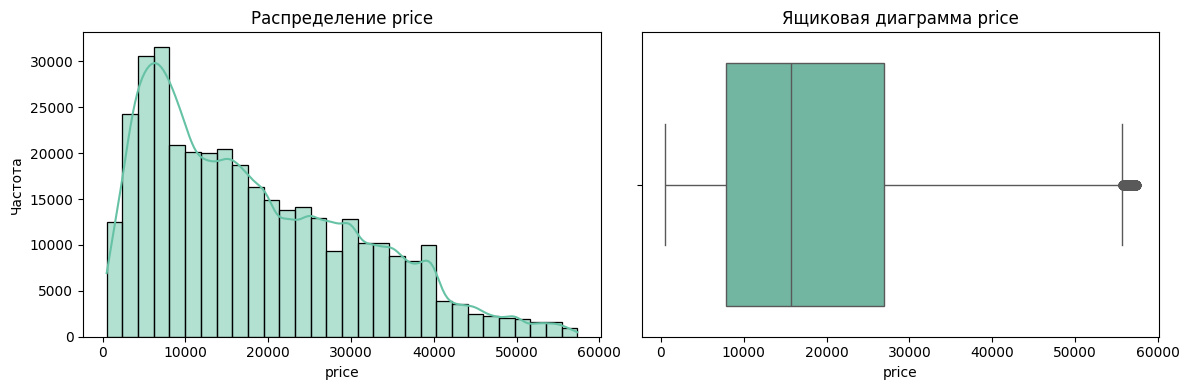

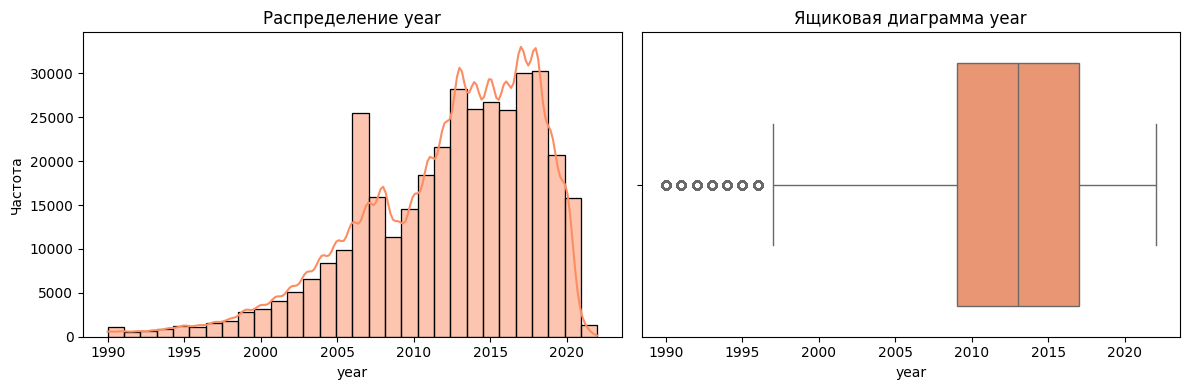

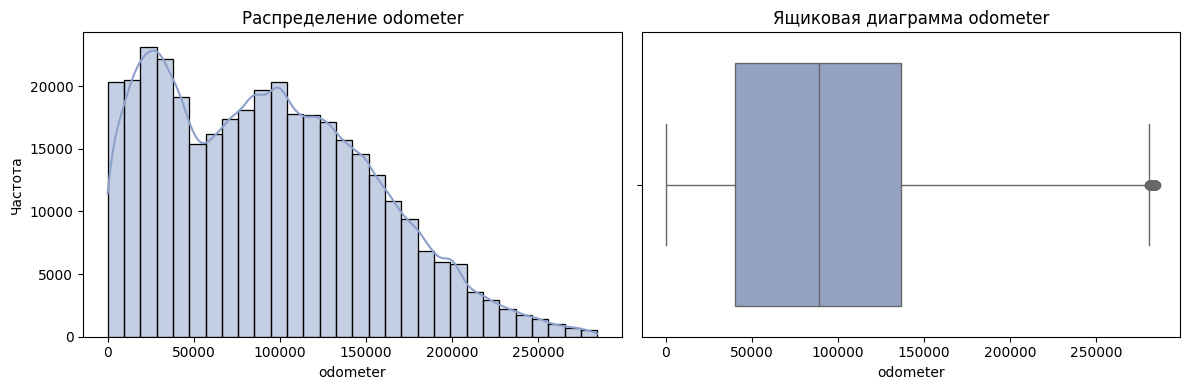

In [32]:
display(data.describe().T)

numerical_cols = data.select_dtypes(include='number').columns

palette = sns.color_palette("Set2", n_colors=len(numerical_cols))

for i, col in enumerate(numerical_cols):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data[col], bins=30, kde=True, ax=axes[0],
                 color=palette[i], line_kws={"color": "black", "linewidth": 1.5})
    
    axes[0].set_title(f'Распределение {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Частота')

    sns.boxplot(x=data[col], ax=axes[1], color=palette[i])
    axes[1].set_title(f'Ящиковая диаграмма {col}')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

### Зависимость цены от года

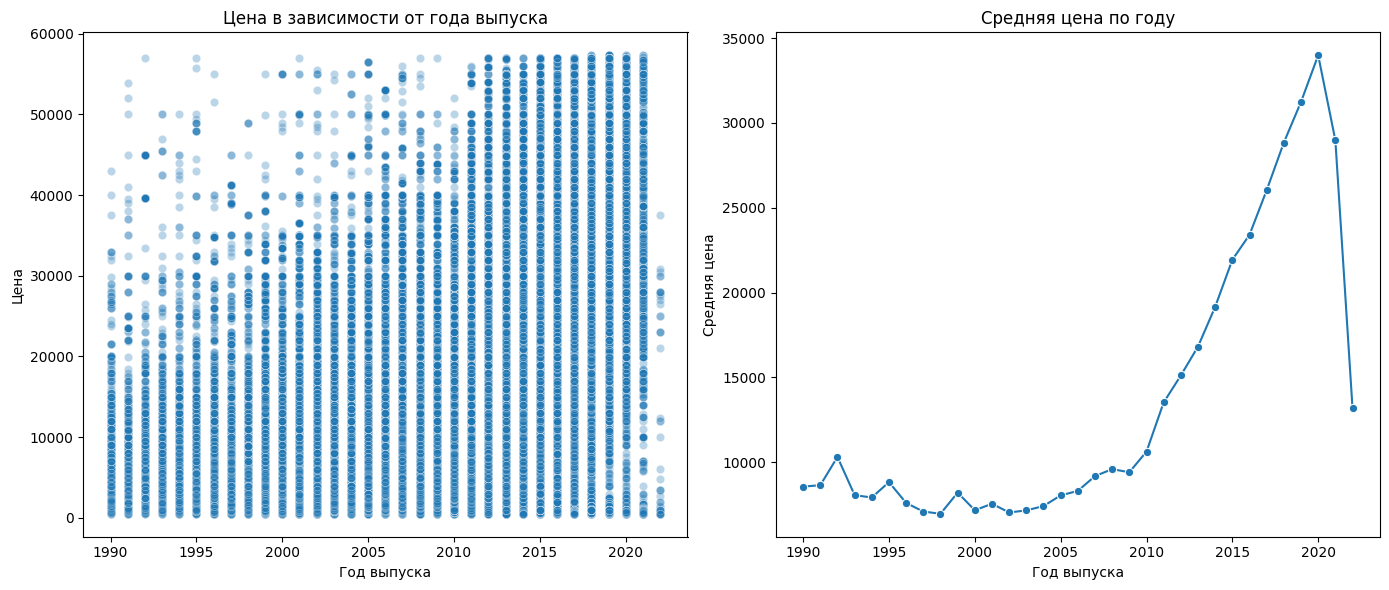

In [33]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='year', y='price', data=data, alpha=0.3)
plt.title('Цена в зависимости от года выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Цена')

plt.subplot(1, 2, 2)
avg_price_by_year = data.groupby('year')['price'].mean().reset_index()
sns.lineplot(x='year', y='price', data=avg_price_by_year, marker='o')
plt.title('Средняя цена по году')
plt.xlabel('Год выпуска')
plt.ylabel('Средняя цена')

plt.tight_layout()
plt.show()

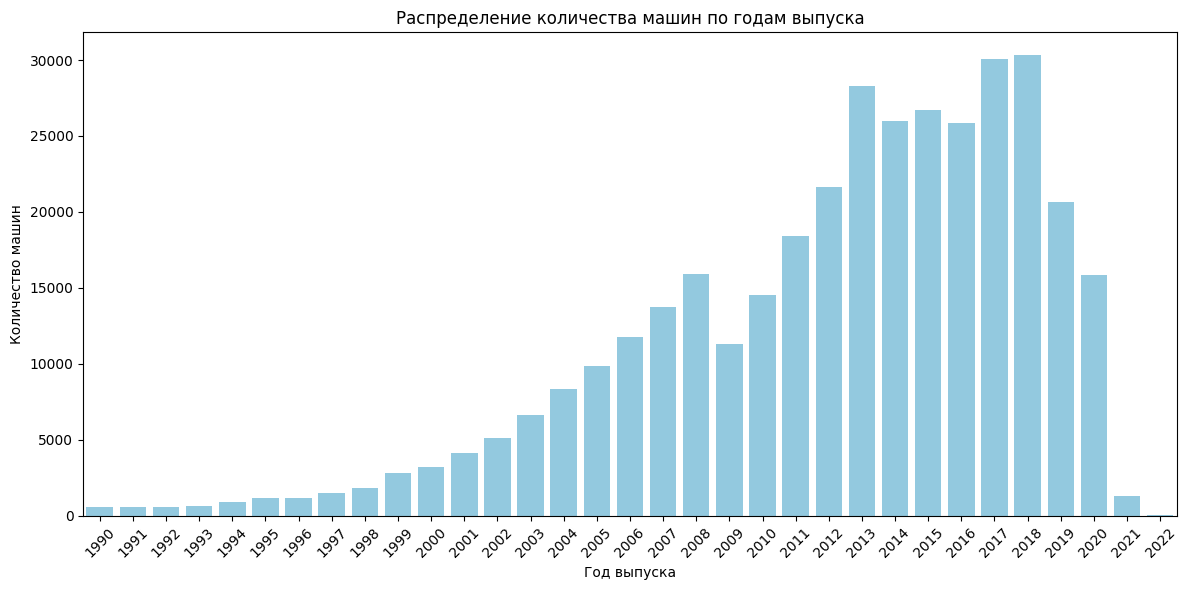

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='year', color='skyblue')
plt.xticks(rotation=45)
plt.title('Распределение количества машин по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество машин')
plt.tight_layout()
plt.show()

In [35]:
after_2020 = data.query('year > 2020').shape[0]
print(f'Количество машин после 2020 года: {after_2020}. Это составляет {round(after_2020 * 100 / data.shape[0], 2)}% от общего количества машин')

Количество машин после 2020 года: 1341. Это составляет 0.37% от общего количества машин


In [36]:
data = data.query('year < 2021')

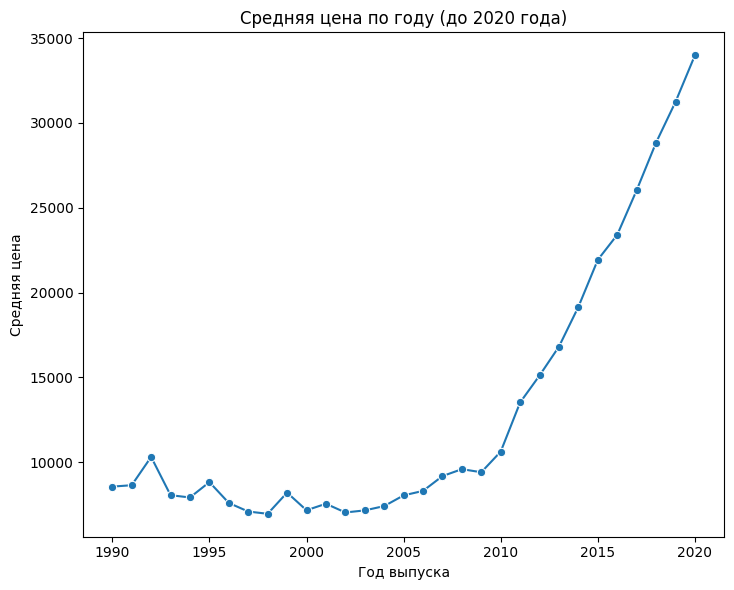

In [37]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 2)
avg_price_by_year = data.groupby('year')['price'].mean().reset_index()
sns.lineplot(x='year', y='price', data=avg_price_by_year, marker='o')
plt.title('Средняя цена по году (до 2020 года)')
plt.xlabel('Год выпуска')
plt.ylabel('Средняя цена')

plt.tight_layout()
plt.show()

### Зависимость цены от пробега

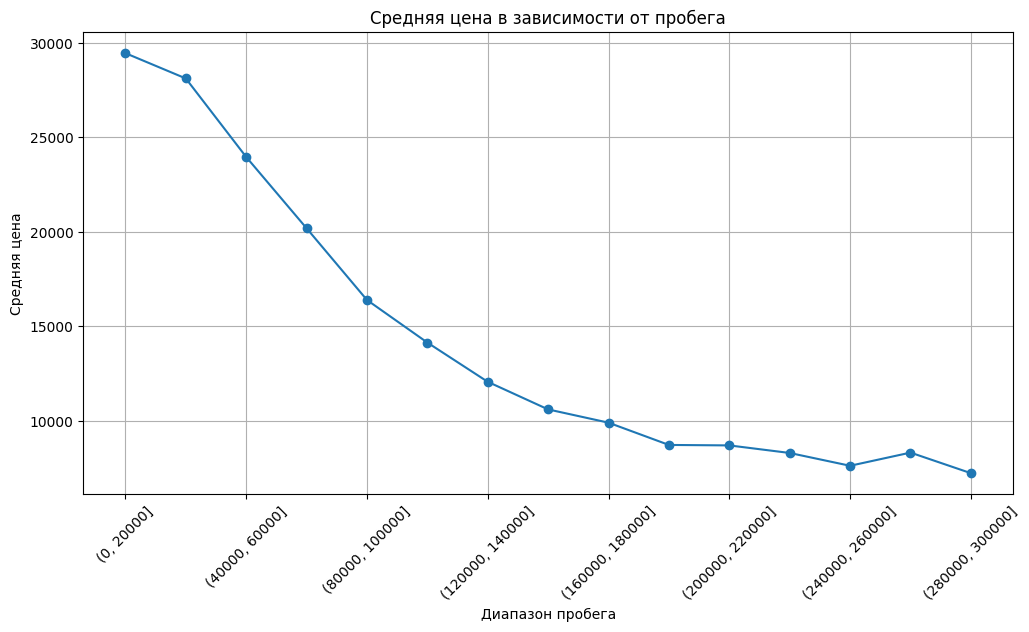

In [38]:
data_odometer = data.copy()
data_odometer['odometer_bin'] = pd.cut(data_odometer['odometer'], bins=np.arange(0, 300001, 20000))

avg_price_by_odometer = data_odometer.groupby('odometer_bin')['price'].mean()

plt.figure(figsize=(12, 6))
avg_price_by_odometer.plot(marker='o')
plt.title("Средняя цена в зависимости от пробега")
plt.xlabel("Диапазон пробега")
plt.ylabel("Средняя цена")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Нормализация и распределение категориальных признаков

In [39]:
display(data.head())

def cat(col):
    count = data[col].nunique()
    total = len(data)

    freq = data[col].value_counts().reset_index()
    freq.columns = [col, 'count']
    freq['percent'] = (freq['count'] / total * 100).round(1)

    freq = freq.sort_values('count', ascending=False).reset_index(drop=True)

    print(f"Всего категорий: {count}")
    display(freq)

    plt.figure(figsize=(12, 6))

    if count <= 10:
        categories = freq[col].astype(str).values
        counts = freq['count'].values
        percents = freq['percent'].values

        palette = sns.color_palette("viridis", len(freq))
        bars = plt.barh(categories, percents, color=palette)

        for bar, p, c in zip(bars, percents, counts):
            plt.text(p + 0.5, bar.get_y() + bar.get_height() / 2,
                     f'{p:.1f}% ({c})',
                     va='center', fontsize=10)

        plt.xlabel('Процент (%)')
        plt.title(f'Процентное распределение {col}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
    else:
        sns.countplot(data=data, x=col, order=freq[col], palette="viridis")
        plt.title(f'Частота встречаемости {col}')
        plt.xticks(rotation=60)
        plt.tight_layout()

    plt.show()

price  year manufacturer                     model fuel  odometer  \
27  33590  2014          gmc  sierra 1500 crew cab slt  gas     57923   
28  22590  2010    chevrolet            silverado 1500  gas     71229   
29  39590  2020    chevrolet       silverado 1500 crew  gas     19160   
30  30990  2017       toyota      tundra double cab sr  gas     41124   
31  15000  2013         ford                 f-150 xlt  gas    128000   

   title_status transmission    drive    type paint_color state  \
27        clean        other  unknown  pickup       white    al   
28        clean        other  unknown  pickup        blue    al   
29        clean        other  unknown  pickup         red    al   
30        clean        other  unknown  pickup         red    al   
31        clean    automatic      rwd   truck       black    al   

                posting_date  
27 2021-05-04 17:31:18+00:00  
28 2021-05-04 17:31:08+00:00  
29 2021-05-04 17:31:25+00:00  
30 2021-05-04 15:41:31+00:00  
31 2021-05-03 19:02:03+00:00

### Марка машины

Всего категорий: 42


manufacturer  count  percent
0              ford  58536     16.3
1         chevrolet  44380     12.3
2            toyota  29951      8.3
3             honda  19118      5.3
4            nissan  16762      4.7
5              jeep  16034      4.5
6               ram  14956      4.2
7               gmc  13802      3.8
8               bmw  13077      3.6
9           unknown  11797      3.3
10            dodge  11067      3.1
11    mercedes-benz   9310      2.6
12          hyundai   9047      2.5
13           subaru   8662      2.4
14       volkswagen   8022      2.2
15            lexus   7532      2.1
16              kia   7221      2.0
17             audi   6776      1.9
18         cadillac   6000      1.7
19            acura   5511      1.5
20         chrysler   5373      1.5
21            buick   4874      1.4
22            mazda   4870      1.4
23         infiniti   4399      1.2
24          lincoln   3804      1.1
25            volvo   3009      0.8
26       mitsubishi   2905      0.8
27             mini   2196      0.6
28          pontiac   1806      0.5
29           jaguar   1799      0.5
30            rover   1775      0.5
31          porsche   1064      0.3
32           saturn   1057      0.3
33          mercury    918      0.3
34       alfa-romeo    810      0.2
35            tesla    743      0.2
36             fiat    724      0.2
37  harley-davidson    132      0.0
38     aston-martin     11      0.0
39       land rover     10      0.0
40          ferrari      4      0.0
41           morgan      2      0.0
42           datsun      0      0.0

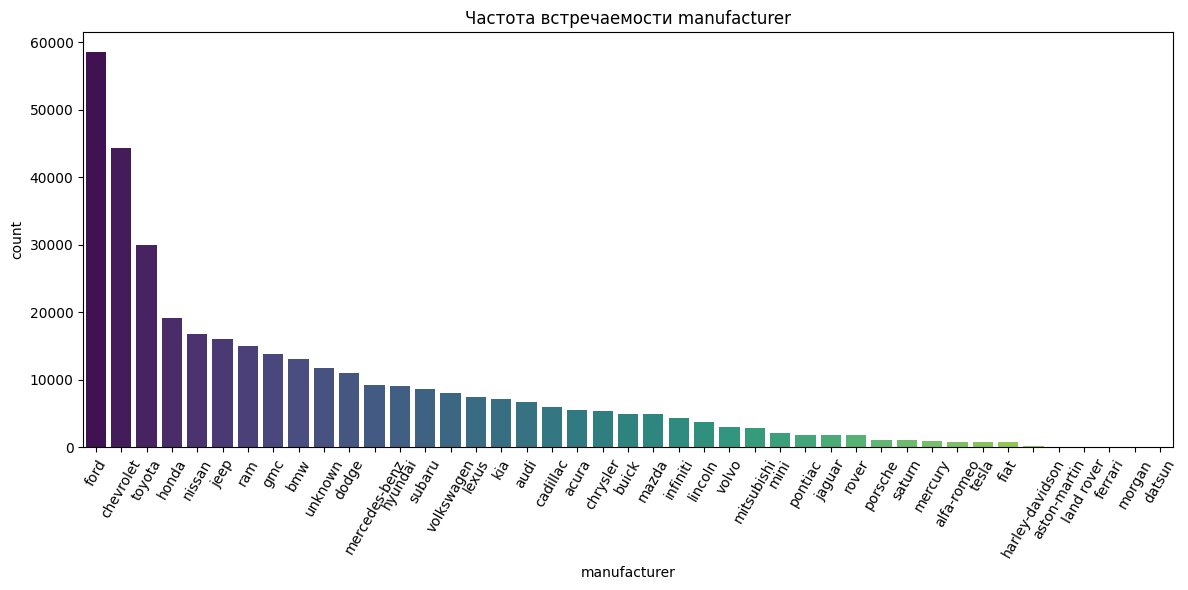

In [40]:
cat('manufacturer')

In [41]:
threshold = 3000

value_counts = data['manufacturer'].value_counts()

rare_categories = value_counts[value_counts < threshold].index.tolist()
if 'unknown' not in rare_categories:
    rare_categories.append('unknown')

data['manufacturer'] = data['manufacturer'].apply(lambda x: 'other' if x in rare_categories else x)

Всего категорий: 26


manufacturer  count  percent
0            ford  58536     16.3
1       chevrolet  44380     12.3
2          toyota  29951      8.3
3           other  27753      7.7
4           honda  19118      5.3
5          nissan  16762      4.7
6            jeep  16034      4.5
7             ram  14956      4.2
8             gmc  13802      3.8
9             bmw  13077      3.6
10          dodge  11067      3.1
11  mercedes-benz   9310      2.6
12        hyundai   9047      2.5
13         subaru   8662      2.4
14     volkswagen   8022      2.2
15          lexus   7532      2.1
16            kia   7221      2.0
17           audi   6776      1.9
18       cadillac   6000      1.7
19          acura   5511      1.5
20       chrysler   5373      1.5
21          buick   4874      1.4
22          mazda   4870      1.4
23       infiniti   4399      1.2
24        lincoln   3804      1.1
25          volvo   3009      0.8

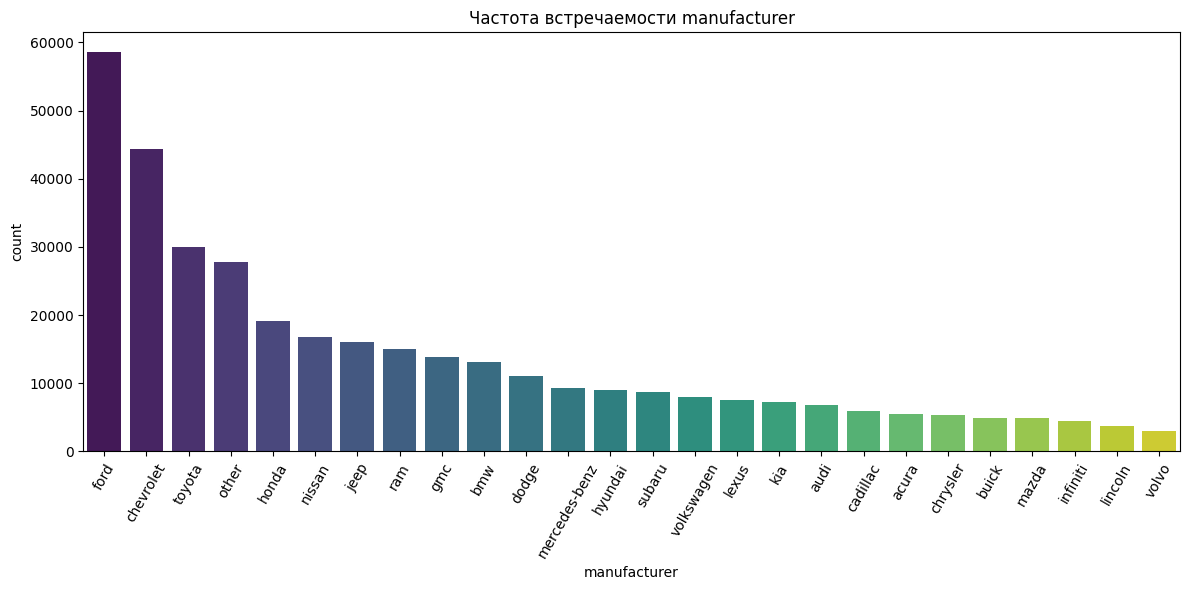

In [42]:
cat('manufacturer')

### Модель машины

In [43]:
print(data['model'].nunique())

23637


In [44]:
data['model'] = data['model'].str.lower().str.strip()

model_counts = data['model'].value_counts()

threshold = 100

popular_models = model_counts[model_counts >= threshold].index

data['model'] = data['model'].apply(lambda x: x if x in popular_models else 'other')

In [45]:
print(data['model'].nunique())

596


### Топливо

Всего категорий: 6


fuel   count  percent
0       gas  304798     84.7
1     other   26179      7.3
2    diesel   20605      5.7
3    hybrid    4680      1.3
4   unknown    2085      0.6
5  electric    1499      0.4

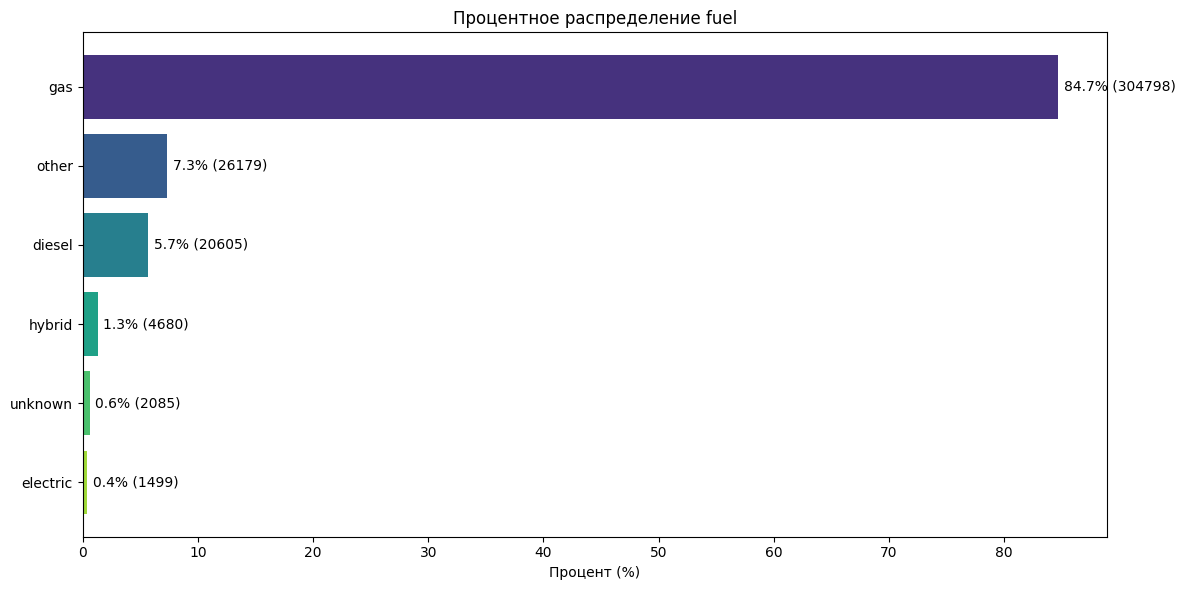

In [46]:
cat('fuel')

In [47]:
data['fuel'] = data['fuel'].replace(['unknown', 'electric'], 'other')

### Юридический статус владения

Всего категорий: 7


title_status   count  percent
0        clean  341514     94.9
1      rebuilt    6954      1.9
2      unknown    6128      1.7
3      salvage    3597      1.0
4         lien    1299      0.4
5      missing     256      0.1
6   parts only      98      0.0

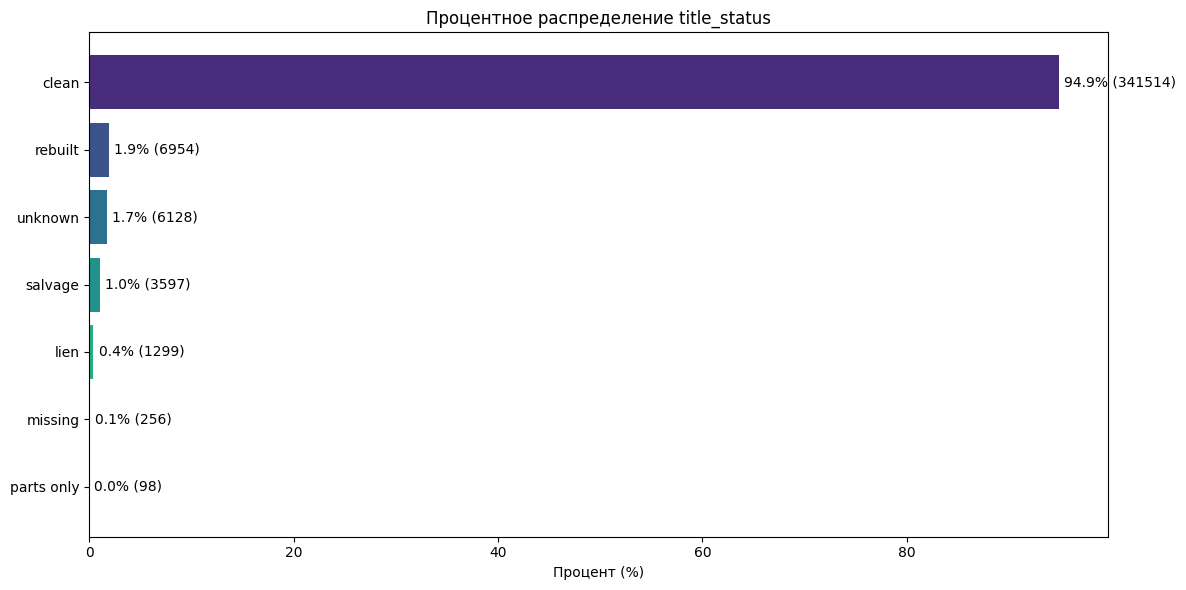

In [48]:
cat('title_status')

In [49]:
data['title_status'] = data['title_status'].replace(['unknown', 'lien', 'missing', 'parts only'], 'other')

### Коробка передач

Всего категорий: 4


transmission   count  percent
0    automatic  280889     78.1
1        other   59977     16.7
2       manual   17563      4.9
3      unknown    1417      0.4

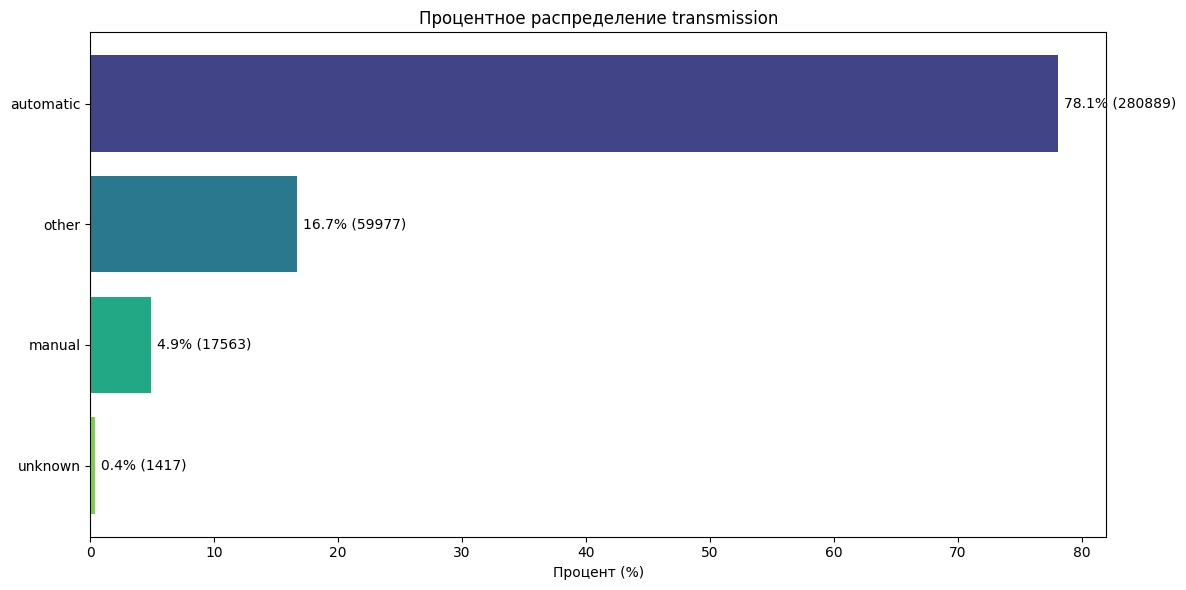

In [50]:
cat('transmission')

In [51]:
data['transmission'] = data['transmission'].replace(['unknown'], 'other')

### Тип привода

Всего категорий: 4


drive   count  percent
0      4wd  109555     30.4
1  unknown  108974     30.3
2      fwd   94102     26.2
3      rwd   47215     13.1

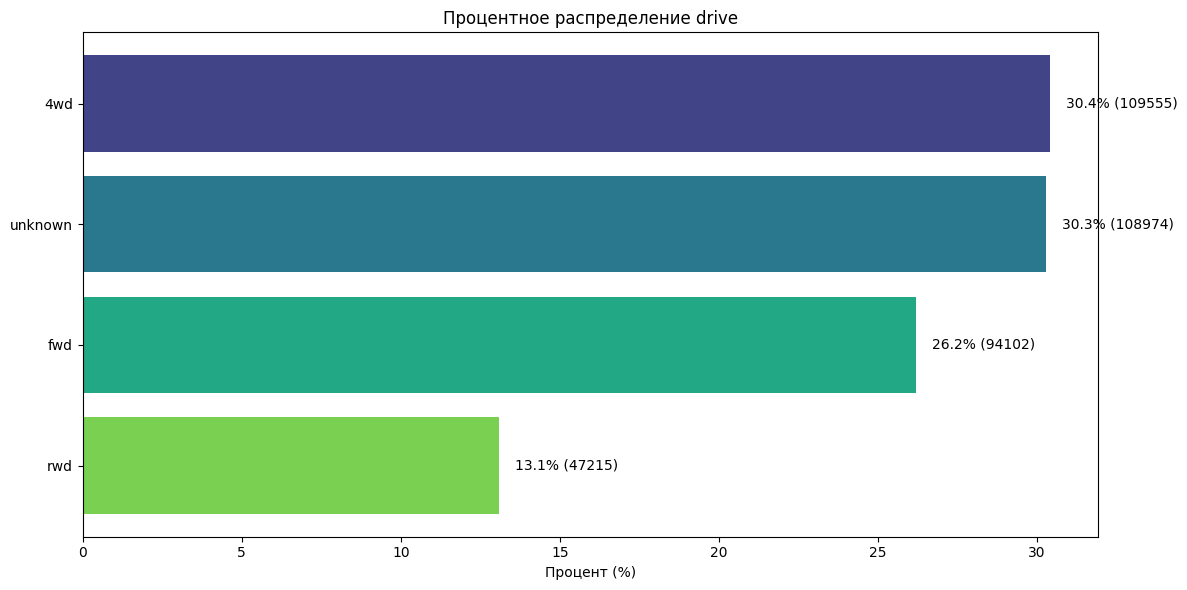

In [52]:
cat('drive')

### Тип кузова

Всего категорий: 14


type  count  percent
0         sedan  76343     21.2
1       unknown  74542     20.7
2           SUV  66907     18.6
3        pickup  38133     10.6
4         truck  26296      7.3
5         other  18514      5.1
6         coupe  15410      4.3
7     hatchback  15407      4.3
8         wagon   9578      2.7
9           van   7424      2.1
10  convertible   5999      1.7
11     mini-van   4453      1.2
12      offroad    437      0.1
13          bus    403      0.1

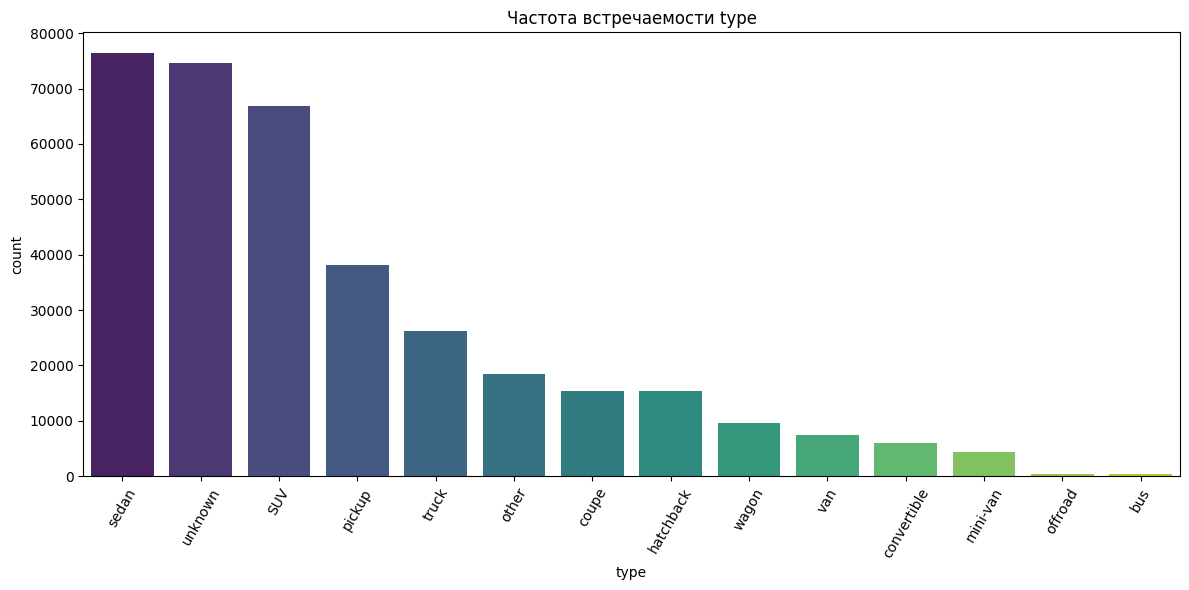

In [53]:
cat('type')

In [54]:
data['type'] = data['type'].replace(['unknown', 'offroad', 'bus'], 'other')

### Цвет машины

Всего категорий: 13


paint_color   count  percent
0      unknown  102681     28.5
1        white   67708     18.8
2        black   54921     15.3
3       silver   38539     10.7
4         blue   27258      7.6
5          red   26189      7.3
6         grey   21465      6.0
7        green    6129      1.7
8        brown    5653      1.6
9       custom    5641      1.6
10      orange    1554      0.4
11      yellow    1547      0.4
12      purple     561      0.2

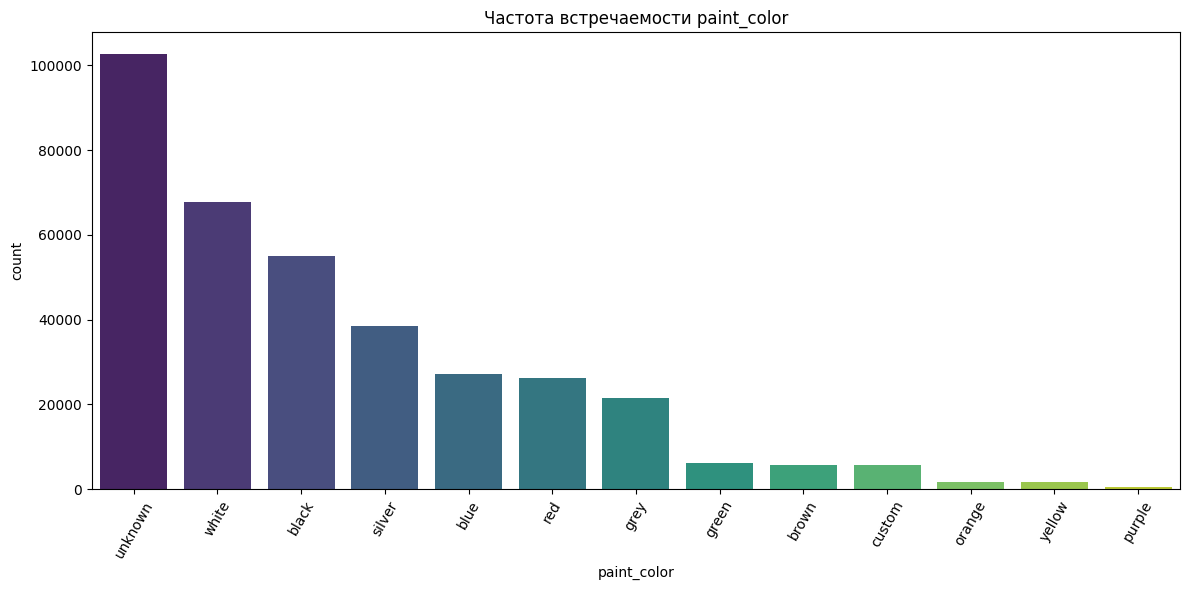

In [55]:
cat('paint_color')

In [56]:
data['paint_color'] = data['paint_color'].replace(['unknown', 'green', 'brown', 'custom', 'orange', 'yellow', 'purple'], 'other')

## Распределение признаков по штатам

### Какие есть штаты

In [57]:
data['state'].unique()

['al', 'ak', 'az', 'ar', 'ca', ..., 'va', 'wa', 'wv', 'wi', 'wy']
Length: 51
Categories (51, object): ['ak', 'al', 'ar', 'az', ..., 'wa', 'wi', 'wv', 'wy']

In [58]:
us_states = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'
}

state_table = pd.DataFrame(list(us_states.items()), columns=['State Abbreviation', 'Full Name'])

state_table = state_table.sort_values('Full Name').reset_index(drop=True)

state_table 

State Abbreviation             Full Name
0                  AL               Alabama
1                  AK                Alaska
2                  AZ               Arizona
3                  AR              Arkansas
4                  CA            California
5                  CO              Colorado
6                  CT           Connecticut
7                  DE              Delaware
8                  DC  District of Columbia
9                  FL               Florida
10                 GA               Georgia
11                 HI                Hawaii
12                 ID                 Idaho
13                 IL              Illinois
14                 IN               Indiana
15                 IA                  Iowa
16                 KS                Kansas
17                 KY              Kentucky
18                 LA             Louisiana
19                 ME                 Maine
20                 MD              Maryland
21                 MA         Massachusetts
22                 MI              Michigan
23                 MN             Minnesota
24                 MS           Mississippi
25                 MO              Missouri
26                 MT               Montana
27                 NE              Nebraska
28                 NV                Nevada
29                 NH         New Hampshire
30                 NJ            New Jersey
31                 NM            New Mexico
32                 NY              New York
33                 NC        North Carolina
34                 ND          North Dakota
35                 OH                  Ohio
36                 OK              Oklahoma
37                 OR                Oregon
38                 PA          Pennsylvania
39                 RI          Rhode Island
40                 SC        South Carolina
41                 SD          South Dakota
42                 TN             Tennessee
43                 TX                 Texas
44                 UT                  Utah
45                 VT               Vermont
46                 VA              Virginia
47                 WA            Washington
48                 WV         West Virginia
49                 WI             Wisconsin
50                 WY               Wyoming

### Средняя цена

In [59]:
pio.renderers.default = 'notebook'

data['state'] = data['state'].str.upper()

state_price = data.groupby('state')['price'].mean().reset_index()
state_price.columns = ['state', 'avg_price']

fig = px.choropleth(
    state_price,
    locations='state',
    locationmode='USA-states',
    color='avg_price',
    color_continuous_scale='Cividis',
    scope='usa',
    labels={'avg_price': 'Средняя цена'},
    title='Распределение средней цены по штатам США'
)
fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'), margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

### Средний пробег

In [60]:
state_price = data.groupby('state')['odometer'].mean().reset_index()
state_price.columns = ['state', 'avg_odometer']

fig = px.choropleth(
    state_price,
    locations='state',
    locationmode='USA-states',
    color='avg_odometer',
    color_continuous_scale='Inferno',
    scope='usa',
    labels={'avg_odometer': 'Средний пробег'},
    title='Распределение среднего пробега по штатам США'
)
fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'), margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

### Самый частый год

In [61]:
def safe_mode(series):
    m = mode(series, keepdims=True)
    return m.mode[0] if len(m.mode) > 0 else np.nan

state_mode = data.groupby('state')['year'].agg(safe_mode).reset_index()
state_mode.columns = ['state', 'mode_year']


fig = px.choropleth(
    state_mode,
    locations='state',
    locationmode='USA-states',
    color='mode_year',
    color_continuous_scale='Turbo',
    scope='usa',
    labels={'mode_year': 'Мода года выпуска'},
    title='Мода года выпуска по штатам США'
)

fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'), margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

### Самый частый тип кузова

In [62]:
def safe_mode(series):
    return series.mode().iloc[0] if not series.mode().empty else np.nan

state_body_mode = data.groupby('state')['type'].agg(safe_mode).reset_index()
state_body_mode.columns = ['state', 'mode_type']

fig = px.choropleth(
    state_body_mode,
    locations='state',
    locationmode='USA-states',
    color='mode_type',
    scope='usa',
    labels={'mode_type': 'Тип кузова'},
    title='Наиболее распространённый тип кузова по штатам США',
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    margin={"r": 0, "t": 50, "l": 0, "b": 0}
)

fig.show()

### Общее количество машин

In [63]:
state_counts = data['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']

fig2 = px.choropleth(
    state_counts,
    locations='state',
    locationmode='USA-states',
    color='count',
    scope='usa',
    labels={'count': 'Количество машин'},
    title='Общее количество машин по штатам США',
    color_continuous_scale='Blues'
)
fig2.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    margin={"r": 0, "t": 50, "l": 0, "b": 0}
)
fig2.show()

## Дата и время размещения объявлений

In [64]:
print(data['posting_date'].head())
print(data['posting_date'].min(), data['posting_date'].max())

27   2021-05-04 17:31:18+00:00
28   2021-05-04 17:31:08+00:00
29   2021-05-04 17:31:25+00:00
30   2021-05-04 15:41:31+00:00
31   2021-05-03 19:02:03+00:00
Name: posting_date, dtype: datetime64[ns, UTC]
2021-04-04 07:00:25+00:00 2021-05-05 04:24:09+00:00


In [65]:
data['posting_day'] = data['posting_date'].dt.date
data['weekday'] = data['posting_date'].dt.day_name()
data['hour'] = data['posting_date'].dt.hour
data['is_weekend'] = data['weekday'].isin(['Saturday', 'Sunday'])

### Распределение по общему промежутку времени

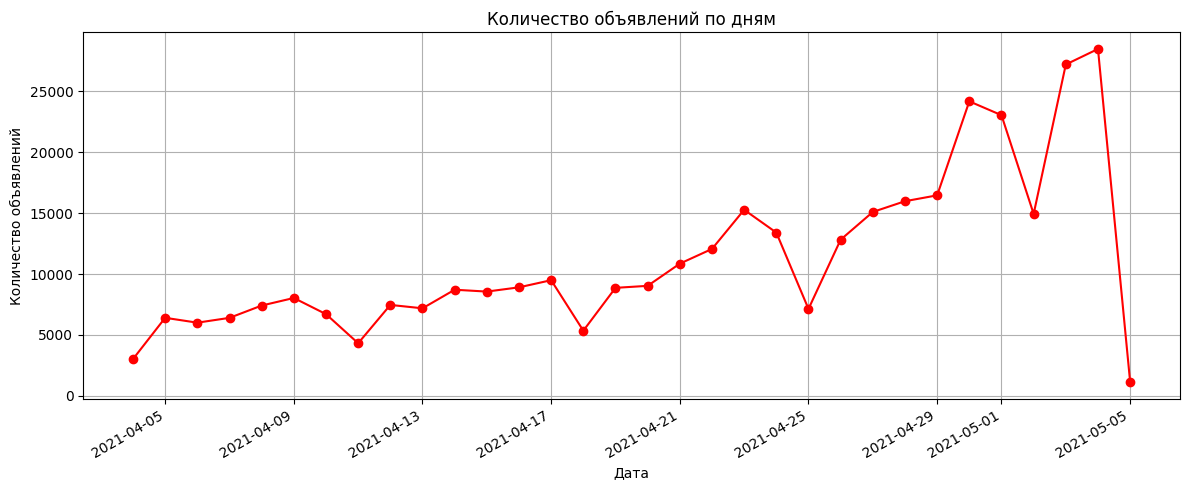

In [66]:
df = data.copy()

df['day'] = df['posting_date'].dt.floor('D')

daily_counts = df['day'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-', color = 'red')
plt.title('Количество объявлений по дням')
plt.xlabel('Дата')
plt.ylabel('Количество объявлений')
plt.xticks(rotation=30, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

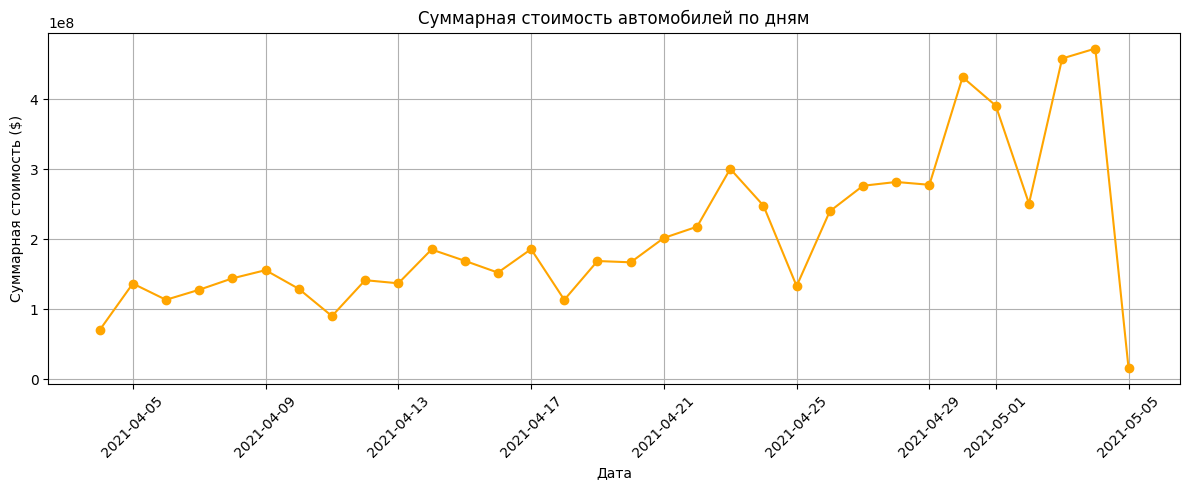

In [67]:
total_price_by_day = data.groupby('posting_day')['price'].sum()

plt.figure(figsize=(12, 5))
plt.plot(total_price_by_day.index, total_price_by_day.values, marker='o', color='orange')
plt.title('Суммарная стоимость автомобилей по дням')
plt.xlabel('Дата')
plt.ylabel('Суммарная стоимость ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

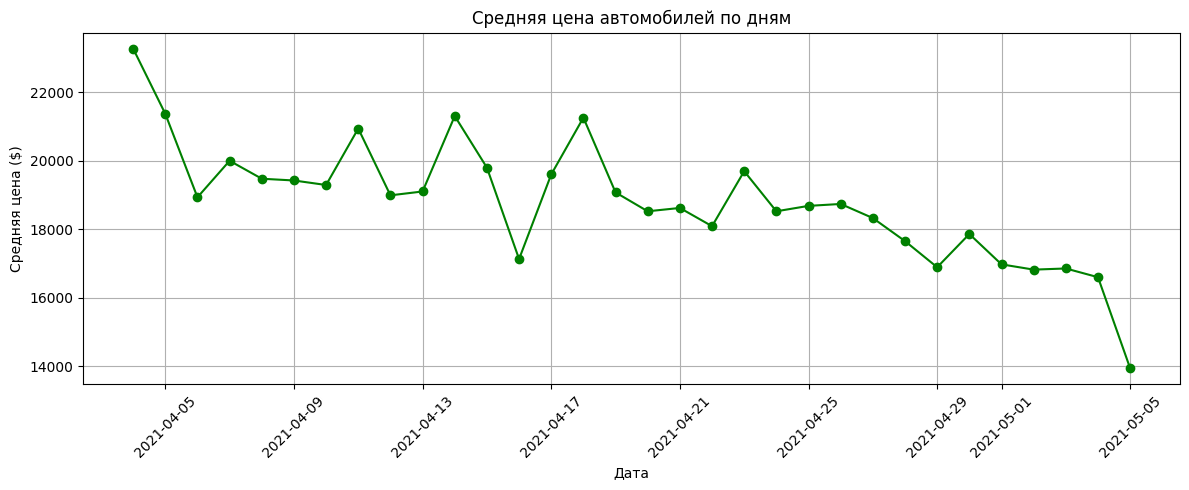

In [68]:
mean_price_by_day = data.groupby('posting_day')['price'].mean()

plt.figure(figsize=(12, 5))
plt.plot(mean_price_by_day.index, mean_price_by_day.values, marker='o', color='green')
plt.title('Средняя цена автомобилей по дням')
plt.xlabel('Дата')
plt.ylabel('Средняя цена ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

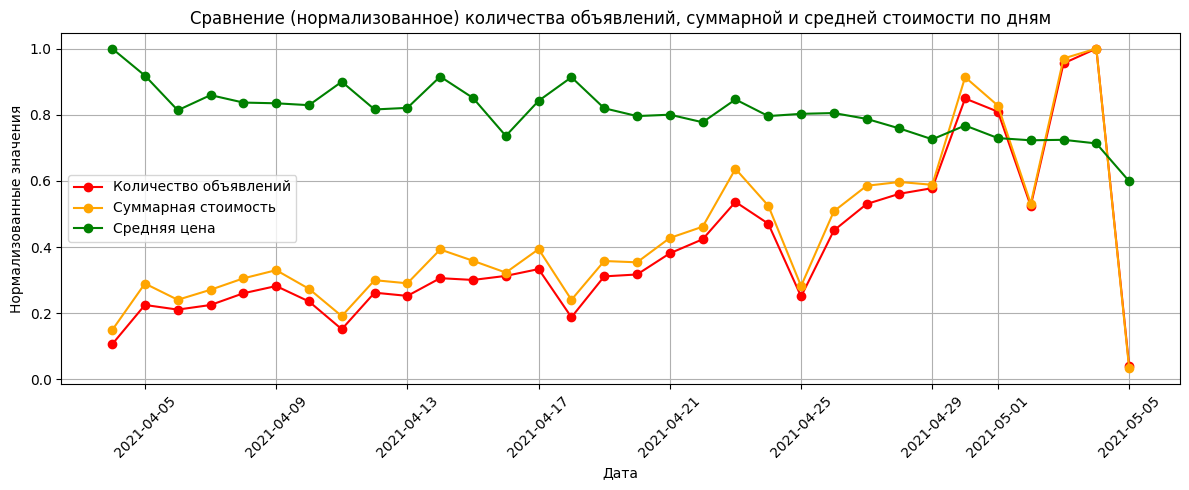

In [69]:
daily_counts = data['posting_day'].value_counts().sort_index()
total_price_by_day = data.groupby('posting_day')['price'].sum()
mean_price_by_day = data.groupby('posting_day')['price'].mean()

daily_counts_norm = daily_counts / daily_counts.max()
total_price_norm = total_price_by_day / total_price_by_day.max()
mean_price_norm = mean_price_by_day / mean_price_by_day.max()

plt.figure(figsize=(12, 5))

plt.plot(daily_counts.index, daily_counts_norm.values, marker='o', linestyle='-', color='red', label='Количество объявлений')

plt.plot(total_price_by_day.index, total_price_norm.values, marker='o', linestyle='-', color='orange', label='Суммарная стоимость')

plt.plot(mean_price_by_day.index, mean_price_norm.values, marker='o', linestyle='-', color='green', label='Средняя цена')

plt.title('Сравнение (нормализованное) количества объявлений, суммарной и средней стоимости по дням')
plt.xlabel('Дата')
plt.ylabel('Нормализованные значения')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [70]:
correlation = daily_counts.corr(total_price_by_day)
print(f'Корреляция: {correlation:.3f}')

Корреляция: 0.995


In [71]:
target_day = date(2021, 5, 5)
print(data.query('posting_day == @target_day').shape[0])

1144


In [72]:
data = data[data['posting_day'] != date(2021, 5, 5)]
print(data.query('posting_day == @target_day').shape[0])

0


### Распределение по дням недели

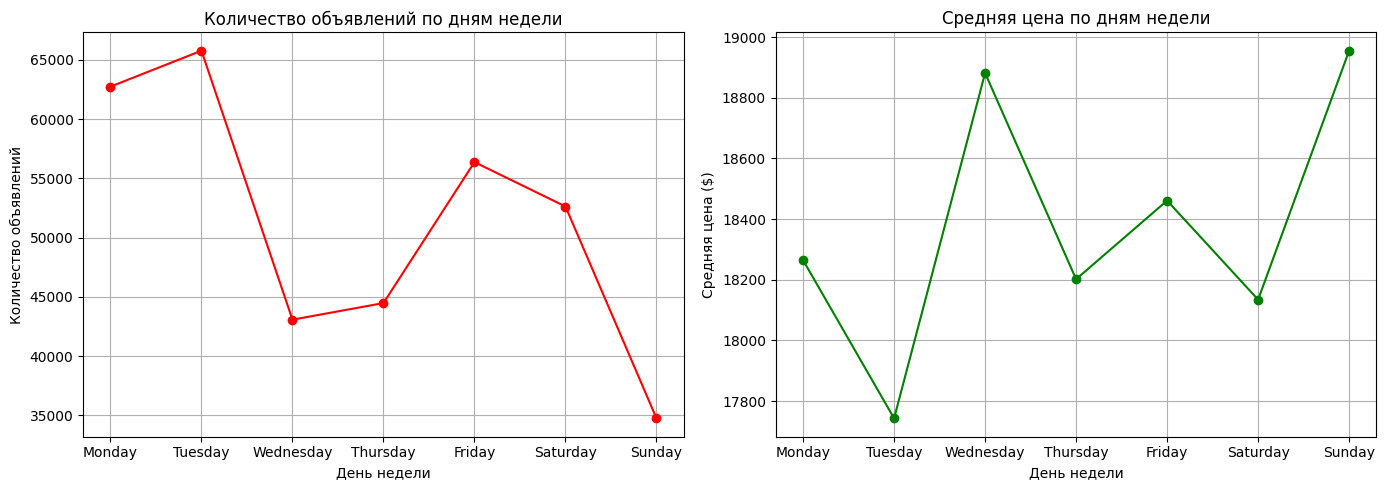

In [73]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekday_counts = df['weekday'].value_counts().reindex(ordered_days)
weekday_mean_price = df.groupby('weekday')['price'].mean().reindex(ordered_days)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(weekday_counts.index, weekday_counts.values, marker='o', linestyle='-', color='red')
plt.title('Количество объявлений по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество объявлений')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(weekday_mean_price.index, weekday_mean_price.values, marker='o', linestyle='-', color='green')
plt.title('Средняя цена по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средняя цена ($)')
plt.grid(True)

plt.tight_layout()
plt.show()

Средняя цена ($):
is_weekend
False    18284.981693
True     18460.918248
Name: price, dtype: float64

Количество объявлений:
is_weekend
False    271316
True      87386
Name: price, dtype: int64


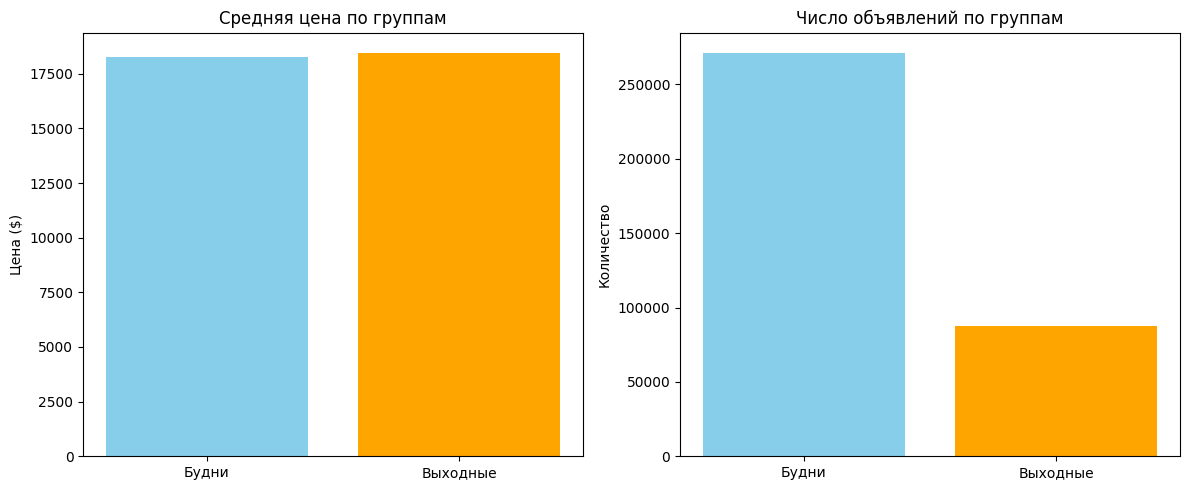

In [74]:
grouped = data.groupby('is_weekend')

avg_price = grouped['price'].mean()

count_posts = grouped['price'].count()

print("Средняя цена ($):")
print(avg_price)

print("\nКоличество объявлений:")
print(count_posts)

labels = ['Будни', 'Выходные']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(labels, avg_price, color=['skyblue', 'orange'])
plt.title('Средняя цена по группам')
plt.ylabel('Цена ($)')

plt.subplot(1, 2, 2)
plt.bar(labels, count_posts, color=['skyblue', 'orange'])
plt.title('Число объявлений по группам')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

### Распределение по часам

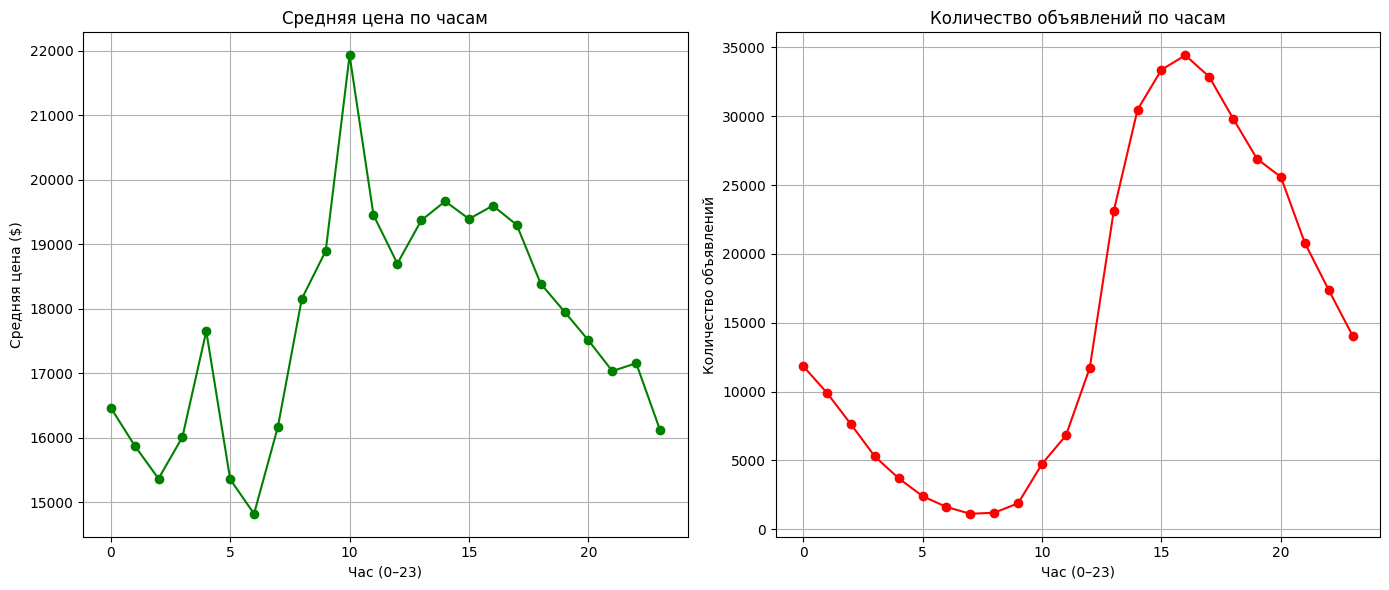

In [75]:
hourly_avg_price = data.groupby('hour')['price'].mean()
hourly_counts = data['hour'].value_counts().sort_index()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(hourly_avg_price.index, hourly_avg_price.values, marker='o', color='green')
plt.title('Средняя цена по часам')
plt.xlabel('Час (0–23)')
plt.ylabel('Средняя цена ($)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', color='red')
plt.title('Количество объявлений по часам')
plt.xlabel('Час (0–23)')
plt.ylabel('Количество объявлений')
plt.grid(True)

plt.tight_layout()
plt.show()

In [76]:
data = data.drop('posting_date', axis = 1)

# Корреляционный анализ

In [77]:
display(data.head(10))

price  year manufacturer                        model fuel  odometer  \
27  33590  2014          gmc     sierra 1500 crew cab slt  gas     57923   
28  22590  2010    chevrolet               silverado 1500  gas     71229   
29  39590  2020    chevrolet          silverado 1500 crew  gas     19160   
30  30990  2017       toyota         tundra double cab sr  gas     41124   
31  15000  2013         ford                    f-150 xlt  gas    128000   
32  27990  2012          gmc  sierra 2500 hd extended cab  gas     68696   
33  34590  2016    chevrolet        silverado 1500 double  gas     29499   
34  35000  2019       toyota                       tacoma  gas     43000   
35  29990  2016    chevrolet        colorado extended cab  gas     17302   
36  38590  2011    chevrolet         corvette grand sport  gas     30237   

   title_status transmission    drive    type paint_color state posting_day  \
27        clean        other  unknown  pickup       white    AL  2021-05-04   
28        clean        other  unknown  pickup        blue    AL  2021-05-04   
29        clean        other  unknown  pickup         red    AL  2021-05-04   
30        clean        other  unknown  pickup         red    AL  2021-05-04   
31        clean    automatic      rwd   truck       black    AL  2021-05-03   
32        clean        other      4wd  pickup       black    AL  2021-05-03   
33        clean        other      4wd  pickup      silver    AL  2021-05-03   
34        clean    automatic      4wd   truck        grey    AL  2021-05-03   
35        clean        other      4wd  pickup         red    AL  2021-05-03   
36        clean        other      rwd   other         red    AL  2021-05-03   

    weekday  hour  is_weekend  
27  Tuesday    17       False  
28  Tuesday    17       False  
29  Tuesday    17       False  
30  Tuesday    15       False  
31   Monday    19       False  
32   Monday    18       False  
33   Monday    17       False  
34   Monday    17       False  
35   Monday    16       False  
36   Monday    12       False

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358702 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   price         358702 non-null  int64   
 1   year          358702 non-null  Int64   
 2   manufacturer  358702 non-null  object  
 3   model         358702 non-null  object  
 4   fuel          358702 non-null  category
 5   odometer      358702 non-null  Int64   
 6   title_status  358702 non-null  category
 7   transmission  358702 non-null  category
 8   drive         358702 non-null  category
 9   type          358702 non-null  category
 10  paint_color   358702 non-null  category
 11  state         358702 non-null  object  
 12  posting_day   358702 non-null  object  
 13  weekday       358702 non-null  object  
 14  hour          358702 non-null  int32   
 15  is_weekend    358702 non-null  bool    
dtypes: Int64(2), bool(1), category(6), int32(1), int64(1), object(5)
memory usage:

In [79]:
col_1 = ['year', 'odometer', 'hour']
for i in col_1:
    data[i] = data[i].astype('int')

data['weekday'] = data['weekday'].astype('category')

data['posting_day'] = pd.to_datetime(data['posting_day'])

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358702 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   price         358702 non-null  int64         
 1   year          358702 non-null  int64         
 2   manufacturer  358702 non-null  object        
 3   model         358702 non-null  object        
 4   fuel          358702 non-null  category      
 5   odometer      358702 non-null  int64         
 6   title_status  358702 non-null  category      
 7   transmission  358702 non-null  category      
 8   drive         358702 non-null  category      
 9   type          358702 non-null  category      
 10  paint_color   358702 non-null  category      
 11  state         358702 non-null  object        
 12  posting_day   358702 non-null  datetime64[ns]
 13  weekday       358702 non-null  category      
 14  hour          358702 non-null  int64         
 15  is_weekend    358702 

## Сила связи признаков с ценой

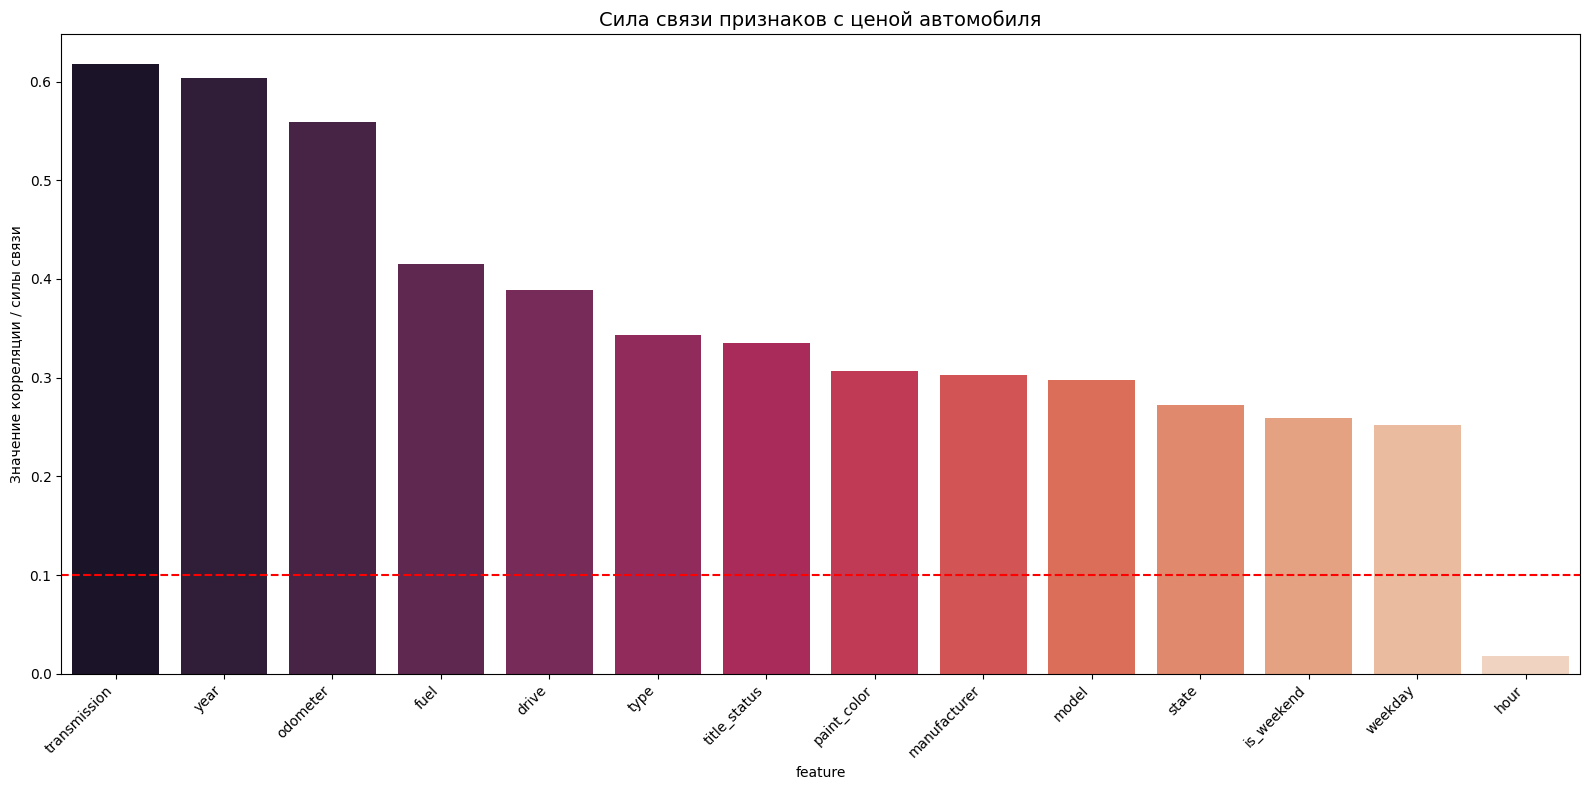

In [81]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] < 2 or confusion_matrix.shape[1] < 2:
        return 0
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

target = 'price'

features = data.columns.drop(target)

numeric_cols = data[features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data[features].select_dtypes(include=['object', 'category']).columns.tolist()
bool_cols = data[features].select_dtypes(include='bool').columns.tolist()

pearson_corr = data[numeric_cols + [target]].corr()[target].drop(target).abs()
pearson_corr = pd.DataFrame({'feature': pearson_corr.index, 'correlation': pearson_corr.values})

cat_corr = []
for col in categorical_cols + bool_cols:
    try:
        score = cramers_v(data[col], data[target])
        cat_corr.append((col, score))
    except Exception as e:
        print(f'Ошибка в {col}: {e}')
cat_corr = pd.DataFrame(cat_corr, columns=['feature', 'correlation'])

all_corr = pd.concat([pearson_corr, cat_corr], ignore_index=True)
all_corr = all_corr.sort_values(by='correlation', ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(
    data=all_corr,
    x='feature',
    y='correlation',
    palette=sns.color_palette('rocket', n_colors=len(all_corr))
)
plt.axhline(y=0.1, color='red', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.title('Сила связи признаков с ценой автомобиля', fontsize=14)
plt.ylabel('Значение корреляции / силы связи')
plt.tight_layout()
plt.show()

## Матрица корреляции признаков

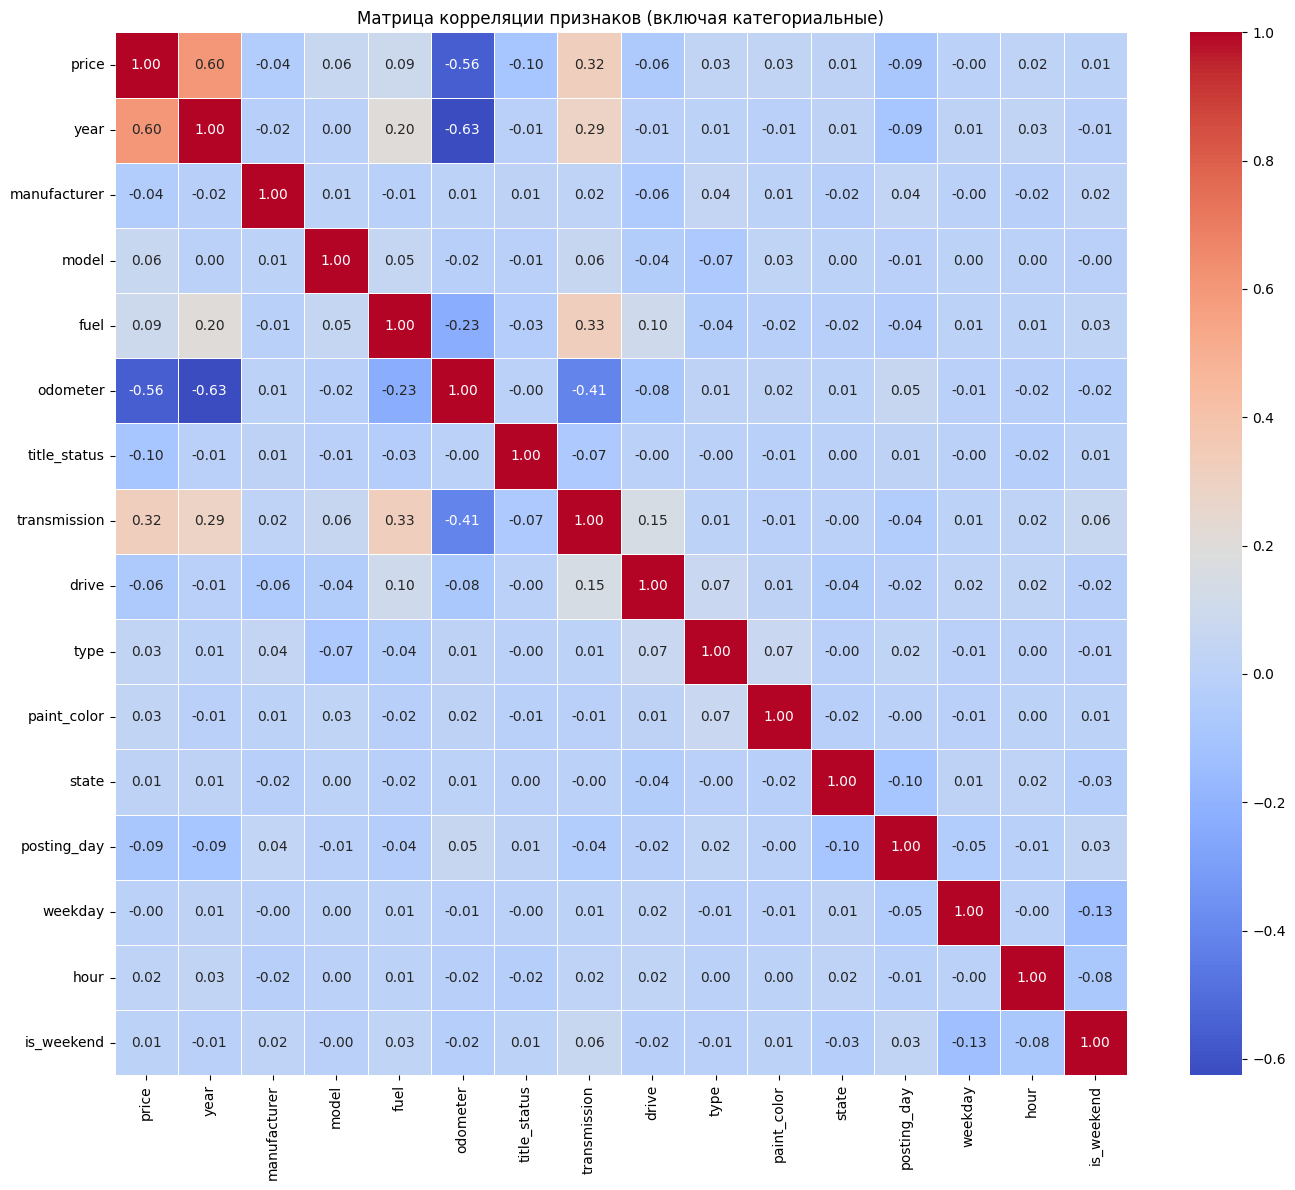

In [82]:
corr_data = data.copy()

cat_cols = corr_data.select_dtypes(include=['object', 'category']).columns
encoder = OrdinalEncoder()
corr_data[cat_cols] = encoder.fit_transform(corr_data[cat_cols])

corr_matrix = corr_data.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Матрица корреляции признаков (включая категориальные)")
plt.tight_layout()
plt.show()

## Важнейшие признаки

/var/folders/1j/wgf74c1d3f116n7z14dqwqcr0000gn/T/ipykernel_27320/1211975558.py:10: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/1j/wgf74c1d3f116n7z14dqwqcr0000gn/T/ipykernel_27320/1211975558.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



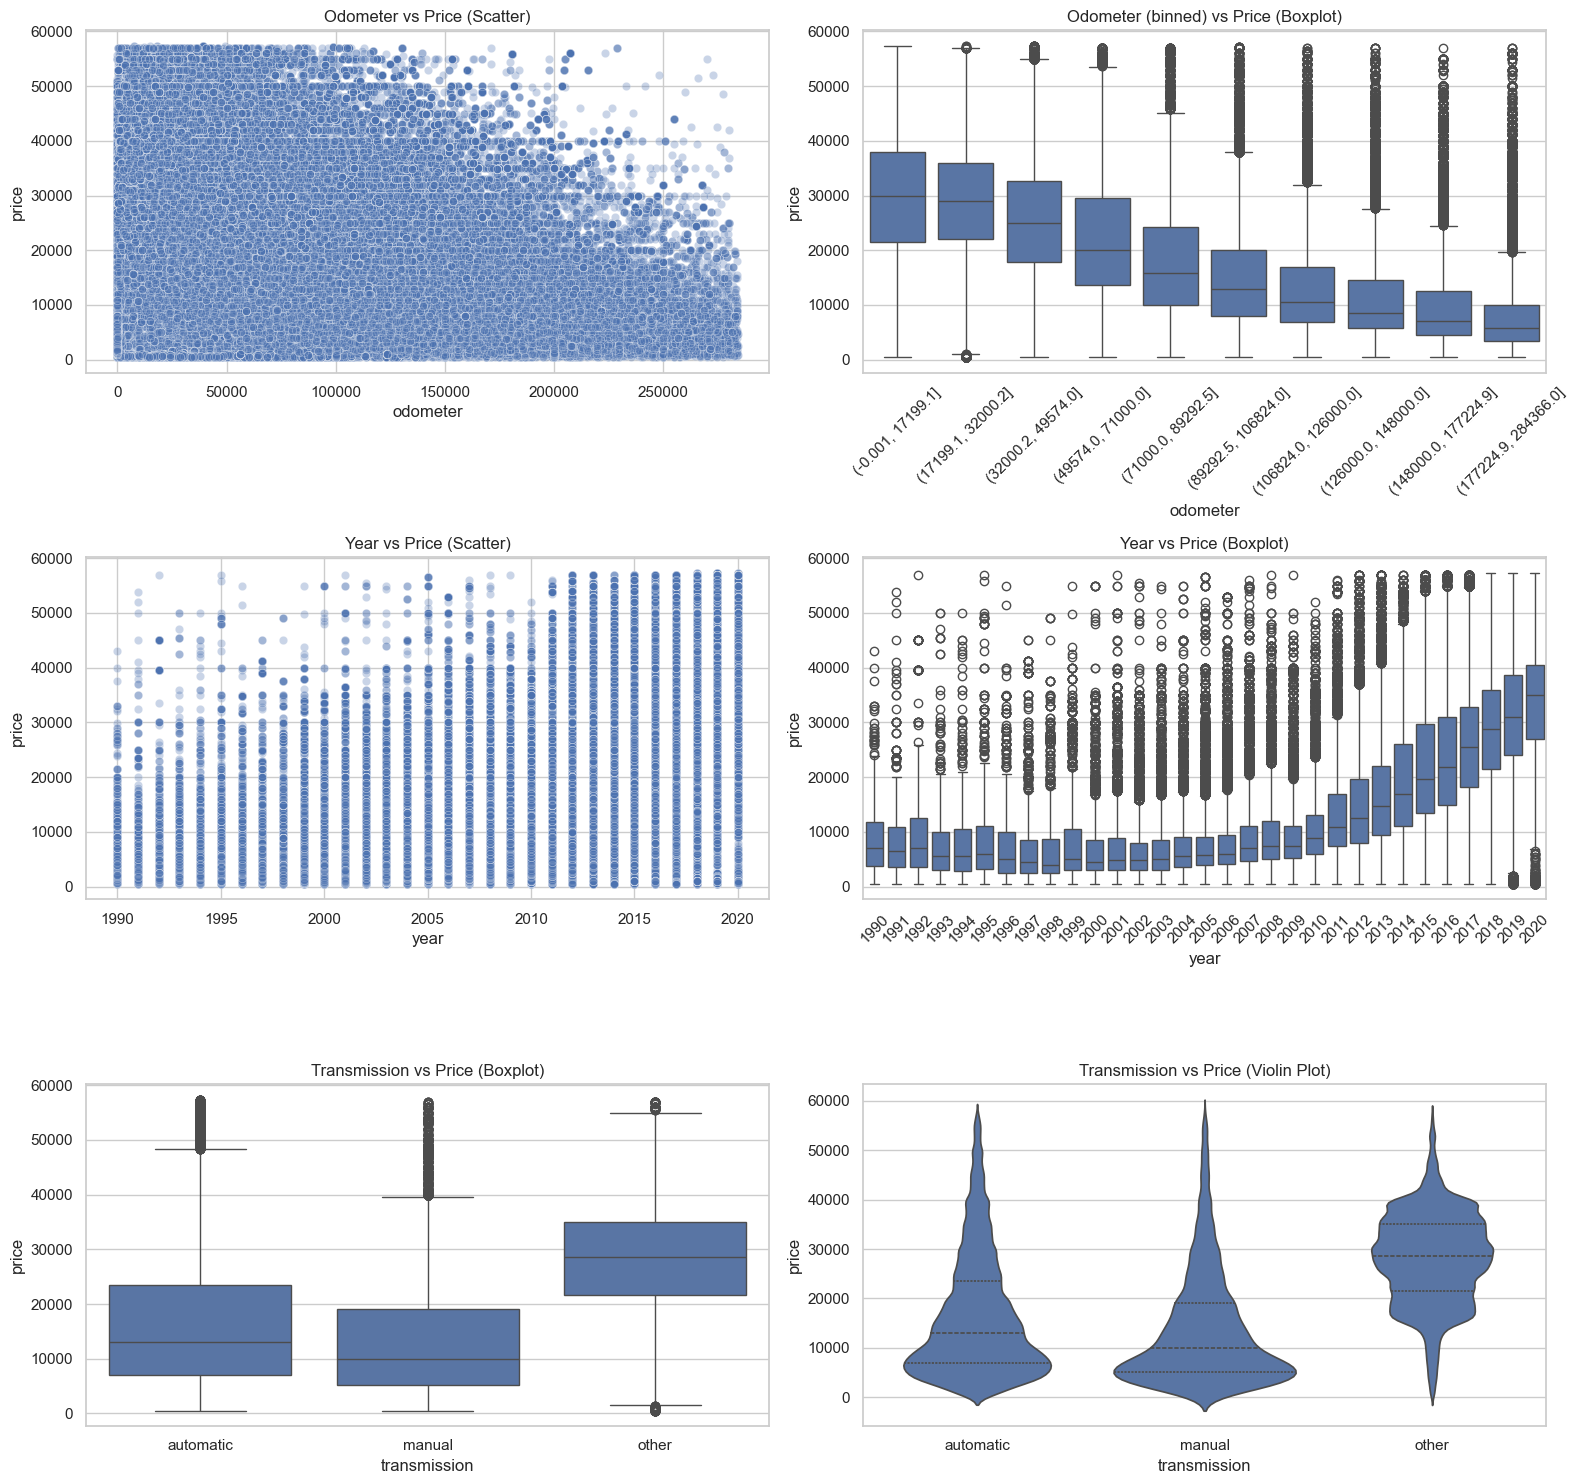

In [83]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(3, 2, figsize=(16, 15))

sns.scatterplot(data=data, x='odometer', y='price', alpha=0.3, ax=axes[0, 0])
axes[0, 0].set_title('Odometer vs Price (Scatter)')

sns.boxplot(data=data, x=pd.qcut(data['odometer'], q=10, duplicates='drop'), y='price', ax=axes[0, 1])
axes[0, 1].set_title('Odometer (binned) vs Price (Boxplot)')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

sns.scatterplot(data=data, x='year', y='price', alpha=0.3, ax=axes[1, 0])
axes[1, 0].set_title('Year vs Price (Scatter)')

sns.boxplot(data=data, x='year', y='price', ax=axes[1, 1])
axes[1, 1].set_title('Year vs Price (Boxplot)')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

sns.boxplot(data=data, x='transmission', y='price', ax=axes[2, 0])
axes[2, 0].set_title('Transmission vs Price (Boxplot)')

sns.violinplot(data=data, x='transmission', y='price', ax=axes[2, 1], inner='quartile')
axes[2, 1].set_title('Transmission vs Price (Violin Plot)')

plt.tight_layout()
plt.show()

In [84]:
data['car_age'] = 2022 - data['year']

In [85]:
data[['year', 'car_age', 'price']].corr()

year   car_age     price
year     1.000000 -1.000000  0.603762
car_age -1.000000  1.000000 -0.603762
price    0.603762 -0.603762  1.000000

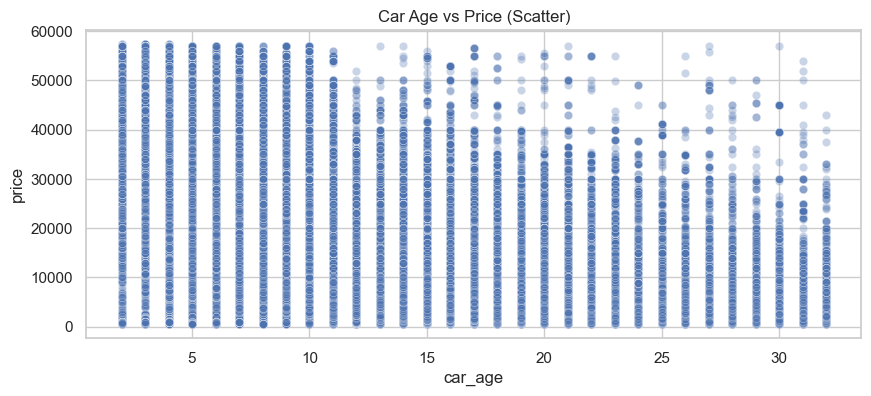

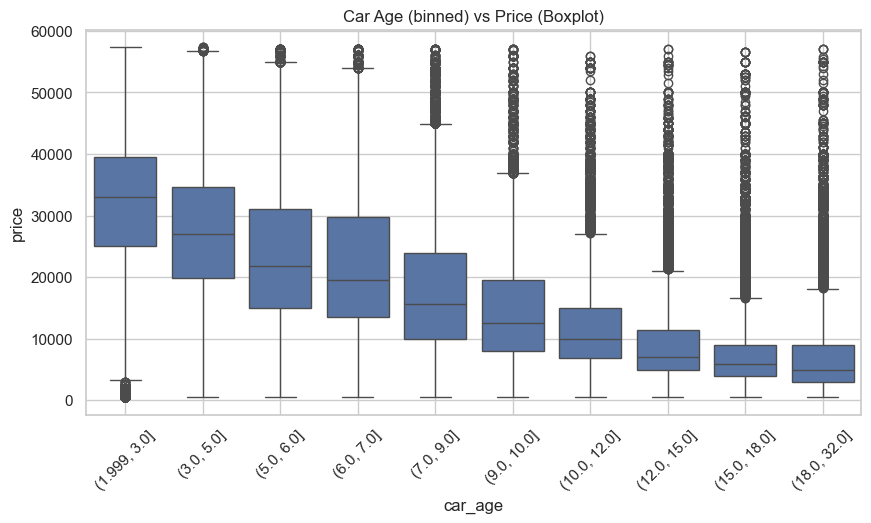

In [86]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=data, x='car_age', y='price', alpha=0.3)
plt.title('Car Age vs Price (Scatter)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=pd.qcut(data['car_age'], q=10), y='price', data=data)
plt.xticks(rotation=45)
plt.title('Car Age (binned) vs Price (Boxplot)')
plt.grid(True)
plt.show()

## Удаление признаков 

In [87]:
data = data.drop(['hour', 'year', 'model', 'manufacturer', 'posting_day', 'weekday', 'is_weekend'], axis = 1)

# Моделирование

In [88]:
print(data.shape)
data.head()

(358702, 10)


price fuel  odometer title_status transmission    drive    type  \
27  33590  gas     57923        clean        other  unknown  pickup   
28  22590  gas     71229        clean        other  unknown  pickup   
29  39590  gas     19160        clean        other  unknown  pickup   
30  30990  gas     41124        clean        other  unknown  pickup   
31  15000  gas    128000        clean    automatic      rwd   truck   

   paint_color state  car_age  
27       white    AL        8  
28        blue    AL       12  
29         red    AL        2  
30         red    AL        5  
31       black    AL        9

## Подготовка данных

In [89]:
target = 'price'

RANDOM_STATE = 42
TEST_SIZE_1 = 0.3
TEST_SIZE_2 = 0.5


X = data.drop(columns=[target], axis = 1) 
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=TEST_SIZE_1,  
                                                    random_state=RANDOM_STATE)

X_valid, X_test, y_valid, y_test = train_test_split(X_test, 
                                                    y_test, 
                                                    test_size=TEST_SIZE_2, 
                                                    random_state=RANDOM_STATE)

In [90]:
ohe_col = ['state']
ord_col = X.select_dtypes(include='category').columns.tolist()
num_col = X.select_dtypes(include='number').columns.tolist()

print(ohe_col)
print(ord_col)
print(num_col)

['state']
['fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
['odometer', 'car_age']


In [91]:
unique = [list(data[col].unique()) for col in ord_col]

print(unique)

[['gas', 'other', 'diesel', 'hybrid'], ['clean', 'rebuilt', 'other', 'salvage'], ['other', 'automatic', 'manual'], ['unknown', 'rwd', '4wd', 'fwd'], ['pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback', 'mini-van', 'sedan', 'convertible', 'wagon', 'van'], ['white', 'blue', 'red', 'black', 'silver', 'grey', 'other']]


In [92]:
ohe_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

ord_pipe = Pipeline([
    ('imputer1', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=unique, handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('imputer2', SimpleImputer(strategy='most_frequent'))
])

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_col),
    ('ord', ord_pipe, ord_col),
    ('num', num_pipe, num_col)
], remainder='drop')


## ML 

In [93]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', LinearRegression())
])

In [94]:
param_grid = [
    {
        'model': [LinearRegression()]
    },
    {
        'model': [DecisionTreeRegressor(random_state=42)],
        'model__max_depth': [5, 10],
        'model__min_samples_leaf': [10, 50]
    },
    {
        'model': [RandomForestRegressor(n_jobs=-1, random_state=42)],
        'model__n_estimators': [30],           
        'model__max_depth': [6, 10]
    },
    {
        'model': [XGBRegressor(n_jobs=-1, verbosity=0, random_state=42)],
        'model__n_estimators': [50],
        'model__max_depth': [4, 8],
        'model__learning_rate': [0.1]
    }
]

In [95]:
grid = GridSearchCV(
    pipe_final,
    param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1,
    verbose=2
)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['state']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('imputer1',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ord',
                                                                                          OrdinalEncoder(categ...
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=-1,
                                                 num_parallel_tree=None, ...)],
                          'model__learning_rate': [0.1],
                          'model__max_depth': [4, 8],
                          'model__n_estimators': [50]}],
             scoring='neg_mean_absolute_error', verbose=2)

In [96]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_valid)

mae = mean_absolute_error(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_valid, y_pred)

metrics_df = pd.DataFrame({
    'Model': [type(best_model.named_steps['model']).__name__],
    'MAE': [round(mae, 2)],
    'MSE': [round(mse, 2)],
    'RMSE': [round(rmse, 2)],
    'R²': [round(r2, 4)]
})

from IPython.display import display
display(metrics_df)

Model      MAE         MSE     RMSE     R²
0  XGBRegressor  4267.68  37816720.0  6149.53  0.761

## DL

In [97]:
X_train_dl = data_preprocessor.fit_transform(X_train)
X_valid_dl = data_preprocessor.transform(X_valid)
y_train_dl = y_train.values
y_valid_dl = y_valid.values

In [98]:
model_dl = models.Sequential([
    Input(shape=(X_train_dl.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=5,          
    restore_best_weights=True
)

model_dl.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model_dl.fit(
    X_train_dl, y_train_dl,
    validation_data=(X_valid_dl, y_valid_dl),
    epochs=500,
    batch_size=256,
    callbacks=[early_stop], 
    verbose=1
)

Epoch 1/500
981/981 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - loss: 369181472.0000 - mae: 15083.1133 - val_loss: 118786160.0000 - val_mae: 8600.0820
Epoch 2/500
981/981 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step - loss: 100498160.0000 - mae: 7714.9038 - val_loss: 74781848.0000 - val_mae: 6368.6265
Epoch 3/500
981/981 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step - loss: 72336552.0000 - mae: 6221.9097 - val_loss: 66235332.0000 - val_mae: 5967.9478
Epoch 4/500
981/981 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - loss: 64938148.0000 - mae: 5868.9028 - val_loss: 61746932.0000 - val_mae: 5723.6523
Epoch 5/500
981/981 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - loss: 61099492.0000 - mae: 5672.8647 - val_loss: 59746488.0000 - val_mae: 5628.6670
Epoch 6/500
981/981 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - loss: 59617732.0000 - mae: 5586.0269 - val_loss: 58968256.0000 - val_mae: 5566.3506
Epoch 7/500
981/981 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - loss: 58907472.0000 - mae: 5544.7559 - val_loss: 58492480.0000 - val_mae: 5551.6304
Epoch 8/5

In [99]:
y_pred_dl = model_dl.predict(X_valid_dl).flatten()

mae_dl = mean_absolute_error(y_valid_dl, y_pred_dl)
mse_dl = mean_squared_error(y_valid_dl, y_pred_dl)
rmse_dl = np.sqrt(mse_dl)
r2_dl = r2_score(y_valid_dl, y_pred_dl)

metrics_dl = pd.DataFrame({
    'Model': ['NeuralNetwork'],
    'MAE': [round(mae_dl, 2)],
    'MSE': [round(mse_dl, 2)],
    'RMSE': [round(rmse_dl, 2)],
    'R²': [round(r2_dl, 4)]
})

display(metrics_dl)

1682/1682 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step


Model      MAE         MSE     RMSE      R²
0  NeuralNetwork  4481.24  41079332.0  6409.32  0.7404

In [100]:
X_test_final = data_preprocessor.transform(X_test)
y_test_final = y_test.values 

In [101]:
y_pred_test = best_model.predict(X_test)

mae_test = mean_absolute_error(y_test_final, y_pred_test)
mse_test = mean_squared_error(y_test_final, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test_final, y_pred_test)

test_metrics = pd.DataFrame({
    'Dataset': ['Test'],
    'Model': [type(best_model.named_steps['model']).__name__],
    'MAE': [round(mae_test, 2)],
    'MSE': [round(mse_test, 2)],
    'RMSE': [round(rmse_test, 2)],
    'R²': [round(r2_test, 4)]
})

display(test_metrics)

Dataset         Model      MAE         MSE     RMSE      R²
0    Test  XGBRegressor  4267.41  38064096.0  6169.61  0.7614